## Import

In [1]:
import ROOT as rt
import csv
import re
import sys
import os
import collections
from collections import OrderedDict
import uproot
import pandas as pd
from root_numpy import array2tree
import scipy
import awkward
import numpy as np
import time
import math
from scipy.stats import norm
#import PrettyTable

sys.path.append('/afs/desy.de/user/l/lbenato/cms-lpc-llp_repo/run3_muon_system_analysis/lib/')
from histo_utilities import create_TH1D, create_TH2D, std_color_list, create_TGraph, make_ratio_plot, addOverflow
from helper_functions import deltaR, deltaPhi, drawCMS
#from helper import *

rt.gStyle.SetOptStat(0)
rt.gROOT.SetBatch(True)

Welcome to JupyROOT 6.24/06


## Load ntuples

## Load variables

In [2]:
fpath =OrderedDict()
tree = OrderedDict()

start_t = time.time()
data_year = 2022

tag  = 'V1p19'
vers = 'v6_Pedro'
data_label = {}
#v1 includes events without selections
#v3 includes events with at least 2 clusters
#v4: no event level cuts, clusters made with DBSCAN, HLT time definition
#v5: no event level cuts, clusters made with CA

data_path = '/nfs/dust/cms/group/cms-llp/muon_system_run3/'+tag+'/Data'+str(data_year)+'/'+vers+'/'
plot_folder = "v6_ME1_new"
lumi = 23.02*1000
xsec = 48.

if data_year == 2022:
    fpath['data'] = data_path + 'DisplacedJet-EXOCSCCluster_Run2022EFG-PromptReco-v1_goodLumi.root'
    fpath['signal'] = data_path + 'ggH_HToSSTobbbb_MH-125_MS-15_CTau1000_13p6TeV_1pb_weighted.root'
    data_label['data'] = 'Data'
    data_label['signal'] = 'Signal'
    
NEvents = {}
for k,v in fpath.items():
    root_dir = uproot.open(v)
    tree[k] = root_dir['MuonSystem']
    NEvents[k] = root_dir['NEvents'][1]
    a = tree[k]["weight"].array()
    data_weight = np.zeros(100)
    signal_gen_weight = np.zeros(100)
    if k=='signal':
        signal_gen_weight = tree[k]["weight"].array()
    else:
        data_weight = tree[k]["weight"].array()

signal_gen_yield = np.sum(signal_gen_weight)*lumi/NEvents['signal']*48.58
data_all_yield = np.sum(data_weight)

print(signal_gen_yield)
print(data_all_yield)

for k, T in tree.items():
    branch_names = T.keys()

1118334.9661248096
0.0


In [3]:
JET_PT_CUT = 10.0
MUON_PT_CUT = 20.0
N_RECHIT_CUT = 90
jetPt_cut = 50
tightid = False
ring_cut = 50

#cut_based = True
#cut_based_version = 'v4'

intime = True
DPHI_CUT = 1


gLLP_csc = {}


selections_cluster = {}
sel_cluster = {}
sel_jetveto_csc = {}
sel_muonveto_csc = {}
sel_jetveto_dt = {}
sel_muonveto_dt = {}
met_trigger = {}
met = {}
gLLP_beta = {}
jetPt = {}
jetPhi = {}
metPhi = {}
angle ={}
nLeptons = {}
genJetPt = {}
genJetPhi = {}
genMet = {}
genMetPhi = {}
pileupWeight = {}
gLLP_ctau = {}
npv = {}
nRechitClusters = {}
nJets = {}
nJets_50gev = {}
nCscRings = {}
nDtRings = {}

weight = {}
all_weight = {}
jetMet_dPhiMin = {}
dphiMet_cluster = {}
nRechits_sr = {}
jetMet_dPhiMin30_sr = {}
cscClusterTimeSpread = {}
bdt_score = {}
nCscChambers = {}

sel_ev = {}
sel_ev_post = {}
hlt_sel_ev = {}
cluster_index = ''
nRings = {}

#CSC cluster variables
cscClusterMuonVetoPt = {}
cscClusterJetVetoPt = {}
cscClusterPhi = {}
cscClusterEta = {}
cscClusterEta2 = {}
cscClusterEta3 = {}
cscClusterR = {}
cscClusterZ = {}
cscClusterSize = {}
cscClusterSize2 = {}
cscClusterSize3 = {}
cscClusterTimeSpread = {}
cscClusterTime = {}
cscClusterTime2 = {}
cscClusterTime3 = {}
cscClusterMet_dPhi = {}
cscClusterNStation = {}
cscClusterAvgStation = {}
cscClusterMaxStation = {}
cscClusterDphi = {}
cscClusterDNN = {}

tr_cscClusterMuonVetoPt = {}
tr_cscClusterJetVetoPt = {}
tr_cscClusterPhi = {}
tr_cscClusterEta = {}
tr_cscClusterEta2 = {}
tr_cscClusterEta3 = {}
tr_cscClusterR = {}
tr_cscClusterZ = {}
tr_cscClusterSize = {}
tr_cscClusterSize2 = {}
tr_cscClusterSize3 = {}
tr_cscClusterTimeSpread = {}
tr_cscClusterTime = {}
tr_cscClusterTime2 = {}
tr_cscClusterTime3 = {}
tr_cscClusterMet_dPhi = {}
tr_cscClusterNStation = {}
tr_cscClusterAvgStation = {}
tr_cscClusterMaxStation = {}
tr_cscClusterDphi = {}
tr_cscClusterDNN = {}

nCscClusters = {}

#cscClusterNRechitMinus11 = {}
#cscClusterNRechitPlus11 = {}
#cscClusterNRechitMinus12 = {}
#cscClusterNRechitPlus12 = {}


#DT cluster variables
dtClusterMuonVetoPt = {}
dtClusterJetVetoPt = {}
dtClusterTime = {}
dtClusterPhi = {}
dtClusterEta = {}
dtClusterSize = {}
dtClusterDphi = {}
nDtClusters = {}
dtClusterNStation = {}
dtClusterMaxStation = {}
dtClusterNHitStation1 = {}
dtCluster_match_MB1hits_0p4 = {}
dtCluster_match_MB1hits_0p5 = {}
dtClusterMaxStationRatio = {}
dtClusterMet_dPhi = {}

deltaEta = {}        
deltaRCluster = {}

metPhi = {}
evtNum = {}
runNum = {}
lumiNum = {}

nMe11 = {}

tree_keys = []
nClusterRatio = {}

ME11_veto = {}
ME12_veto = {}
ME1_veto = {}
MB1_veto = {}

#L1 plateau
first_in_ME11 = {}
first_in_ME12 = {}
first_in_ME13 = {}
first_in_ME21 = {}
first_in_ME22 = {}
first_in_ME31 = {}
first_in_ME32 = {}
first_in_ME41 = {}
first_in_ME42 = {}


first_in_plateau_ME11 = {}
first_in_plateau_ME12 = {}
first_in_plateau_ME13 = {}
first_in_plateau_ME21 = {}
first_in_plateau_ME22 = {}
first_in_plateau_ME31 = {}
first_in_plateau_ME32 = {}
first_in_plateau_ME41 = {}
first_in_plateau_ME42 = {}
first_in_plateau = {}

#L1 plateau - global, non positional
cl_in_ME11 = {}
cl_in_ME12 = {}
cl_in_ME13 = {}
cl_in_ME21 = {}
cl_in_ME22 = {}
cl_in_ME31 = {}
cl_in_ME32 = {}
cl_in_ME41 = {}
cl_in_ME42 = {}

cl_in_plateau_ME11 = {}
cl_in_plateau_ME12 = {}
cl_in_plateau_ME13 = {}
cl_in_plateau_ME21 = {}
cl_in_plateau_ME22 = {}
cl_in_plateau_ME31 = {}
cl_in_plateau_ME32 = {}
cl_in_plateau_ME41 = {}
cl_in_plateau_ME42 = {}
cl_in_plateau = {}



#Angular variables
dPhi_csc_csc = {}
dEta_csc_csc = {}
dR_csc_csc = {}
dt_csc_csc = {}
dPhi_csc_dt = {}
dEta_csc_dt = {}
dR_csc_dt = {}

## Settings

In [4]:
category = 0#-1#0
category = 1
#-1: at least 1csc
#0: exactly 1 csc
#1: 2csc,
#2: 1csc+1dt, 

do_jet_veto = True
do_inverted_jet_veto = False
if (do_jet_veto and do_inverted_jet_veto):
    print("Please check jet veto! Aborting...")
    exit()

do_muon_veto = True
do_inverted_muon_veto = False
if (do_muon_veto and do_inverted_muon_veto):
    print("Please check muon veto! Aborting...")
    exit()

do_csc_time_spread_cut = True
do_csc_in_time_cut = True
do_ME_veto = True
do_MB_veto = True
do_HLT_eta_cut = False#True
do_L1_plateau = True

plot_string = ""
#plot_string = "_jet_veto"
#plot_string = "_csc_time_spread_cut"
#plot_string = "_csc_in_time_cut"
#plot_string = ""
#plot_string = "_ME_veto"
#plot_string = "_ME_veto_HLT_eta_cut"
#plot_string = "_ME_veto_HLT_eta_cut_at_least_1_cluster"
#plot_string = "_ME_veto_HLT_eta_cut_in_time_cut_at_least_1_cluster"
#plot_string+= "_exactly_1_csc_cluster"

#plot_string+= "_exactly_2_csc_clusters_ME_veto"
#plot_string+= "_exactly_2_csc_clusters_ME_veto_time_spread_cut_jet_muon_veto_2nd"
#plot_string+= "_exactly_2_csc_clusters_time_spread_cut_jet_muon_veto_2nd"
#plot_string+= "_2_csc_clusters_ME_veto"
#plot_string+= "_at_least_1_csc_cluster_ME_veto"
#plot_string+= "_csc_dt_cluster_ME_veto"
#plot_string+= "_csc_dt_cluster_ME_MB_veto"

In [5]:
for a in branch_names:
    if "DNN" in str(a):
        print(a)
    #if "dtRechitClusterMaxStationRatio" in str(a):
    #    print(a)
    #if "atio" in str(a):
    #    print(a)
    #if 'csc' in str(a):
    #    print(a)

b'dtRechitClusterDNN'
b'cscRechitClusterDNN'


In [6]:
#def iterative_numpy(a):
#    mask = a > -999.
#    out = np.array([ a[i,mask[i]] for i xrange(a.shape[0]) ])
#    return out

In [7]:
n_1CSC = {}
n_2CSC = {}

n_1CSC_ME1 = {}
n_1CSC_ME1_old = {}
n_2CSC_ME1 = {}
n_2CSC_ME1_old = {}

n_1CSC_ME1_plateau = {}
n_2CSC_ME1_plateau = {}

n_1CSC_ME1_plateau_0lep = {}
n_2CSC_ME1_plateau_0lep = {}

n_2CSC_ME1_plateau_0lep_hlt = {}
n_2CSC_ME1_plateau_0lep_hlt_dphi = {}

for k, T in tree.items():
    
    print("\n")
    print(k)
    tree_keys.append(k)
 
    #ev_num = (T.array('evtNum')<1000000000000000000000000000000000000000000000000000000000000000000000000000000000000)
    ev_num = (T.array('evtNum')>-1)
    #ev_num = (T.array('evtNum')<5000)
    
    pre_sel_csccluster = (T.array('cscRechitClusterSize') >= 0)[ev_num]
    n_pre_cl = pre_sel_csccluster.sum()

    n_1CSC[k] = T.array('weight')[ev_num][n_pre_cl>0].sum()
    print("n_at_least_1_cluster[k]: ", n_1CSC[k])
    n_2CSC[k] = T.array('weight')[ev_num][n_pre_cl>1].sum()

    ###############################################
    #ME1 veto and L1/HLT plateau on trigger cluster
    ME11_veto[k] = np.logical_and(
        T.array('cscRechitCluster' + cluster_index + 'NRechitChamberMinus11')[ev_num]==0  ,
        T.array('cscRechitCluster' + cluster_index + 'NRechitChamberPlus11')[ev_num]==0
    )  

    ME12_veto[k] = np.logical_and(
        T.array('cscRechitCluster' + cluster_index + 'NRechitChamberMinus12')[ev_num]==0  ,
        T.array('cscRechitCluster' + cluster_index + 'NRechitChamberPlus12')[ev_num]==0
    )      

    ME1_veto[k] = ( ME11_veto[k] & ME12_veto[k] )
    

    
    #Old way: ME1_veto applied to all clusters
    sel_csccluster_old = np.logical_and(pre_sel_csccluster,
                                    np.logical_and(ME11_veto[k],ME12_veto[k])
                                   )
    
    n_old_cl = sel_csccluster_old.sum()
    
    n_1CSC_ME1_old[k] = T.array('weight')[ev_num][n_old_cl>0].sum()
    n_2CSC_ME1_old[k] = T.array('weight')[ev_num][n_old_cl>1].sum()
        
    #tmp variables to identify trigger cluster
    tmp_cscClusterR = np.sqrt(  T.array('cscRechitCluster' + cluster_index + 'X')[ev_num][:,:]**2 + T.array('cscRechitCluster' + cluster_index + 'Y')[ev_num][:,:]**2 )
    tmp_cscClusterZ = T.array('cscRechitCluster' + cluster_index + 'Z')[ev_num][:,:]
    tmp_cscClusterSize =  T.array('cscRechitCluster' + cluster_index + 'Size')[ev_num][:,:]
    
    cl_in_ME11[k] = (tmp_cscClusterR>100)&(tmp_cscClusterR<275) &(abs(tmp_cscClusterZ)>580)&(abs(tmp_cscClusterZ)<632) 
    cl_in_ME12[k] = (tmp_cscClusterR>275)&(tmp_cscClusterR<465) &(abs(tmp_cscClusterZ)>668)&(abs(tmp_cscClusterZ)<724)
    cl_in_ME13[k] = (tmp_cscClusterR>505)&(tmp_cscClusterR<700) &(abs(tmp_cscClusterZ)>668)&(abs(tmp_cscClusterZ)<724)

    cl_in_ME21[k] = (tmp_cscClusterR>139)&(tmp_cscClusterR<345) &(abs(tmp_cscClusterZ)>789)&(abs(tmp_cscClusterZ)<850)
    cl_in_ME22[k] = (tmp_cscClusterR>357)&(tmp_cscClusterR<700) &(abs(tmp_cscClusterZ)>791)&(abs(tmp_cscClusterZ)<850)

    cl_in_ME31[k] = (tmp_cscClusterR>160)&(tmp_cscClusterR<345) &(abs(tmp_cscClusterZ)>915)&(abs(tmp_cscClusterZ)<970)
    cl_in_ME32[k] = (tmp_cscClusterR>357)&(tmp_cscClusterR<700) &(abs(tmp_cscClusterZ)>911)&(abs(tmp_cscClusterZ)<970)

    cl_in_ME41[k] = (tmp_cscClusterR>178)&(tmp_cscClusterR<345) &(abs(tmp_cscClusterZ)>1002)&(abs(tmp_cscClusterZ)<1063)
    cl_in_ME42[k] = (tmp_cscClusterR>357)&(tmp_cscClusterR<700) &(abs(tmp_cscClusterZ)>1002)&(abs(tmp_cscClusterZ)<1063)
    
    cl_in_plateau_ME11[k] = cl_in_ME11[k] & (tmp_cscClusterSize>=500)
    cl_in_plateau_ME21[k] = cl_in_ME21[k] & (tmp_cscClusterSize>=500)
    cl_in_plateau_ME31[k] = cl_in_ME31[k] & (tmp_cscClusterSize>=500)
    cl_in_plateau_ME41[k] = cl_in_ME41[k] & (tmp_cscClusterSize>=500)

    cl_in_plateau_ME12[k] = cl_in_ME12[k] & (tmp_cscClusterSize>=200)
    cl_in_plateau_ME13[k] = cl_in_ME13[k] & (tmp_cscClusterSize>=200)
    cl_in_plateau_ME22[k] = cl_in_ME22[k] & (tmp_cscClusterSize>=200)
    cl_in_plateau_ME32[k] = cl_in_ME32[k] & (tmp_cscClusterSize>=200)
    cl_in_plateau_ME42[k] = cl_in_ME42[k] & (tmp_cscClusterSize>=200)    
    
    cl_in_plateau[k] = cl_in_plateau_ME11[k] | cl_in_plateau_ME12[k] | cl_in_plateau_ME13[k] | cl_in_plateau_ME21[k] | cl_in_plateau_ME22[k] | cl_in_plateau_ME31[k] | cl_in_plateau_ME32[k] | cl_in_plateau_ME41[k] | cl_in_plateau_ME42[k]

    #event level selection: at least 1 cluster fulfilling the condition
    sel_ev_new_me1 = (ME1_veto[k]).any()==True
    sel_ev_new_me1_pl = (ME1_veto[k] & cl_in_plateau[k]).any()==True
    
    #now counting the clusters
    sel_csccluster_new_me1 = pre_sel_csccluster & sel_ev_new_me1
    sel_csccluster_new_me1_pl = pre_sel_csccluster & sel_ev_new_me1_pl
    
    n_new_cl_me1 = sel_csccluster_new_me1.sum()
    n_new_cl_me1_pl = sel_csccluster_new_me1_pl.sum()
    
   
    n_1CSC_ME1[k] = T.array('weight')[ev_num][n_new_cl_me1>0].sum()
    n_2CSC_ME1[k] = T.array('weight')[ev_num][n_new_cl_me1>1].sum()
    
    n_1CSC_ME1_plateau[k] = T.array('weight')[ev_num][n_new_cl_me1_pl>0].sum()
    n_2CSC_ME1_plateau[k] = T.array('weight')[ev_num][n_new_cl_me1_pl>1].sum()    
    #From now: ask at least 1 cluster!
    
    #Remove trigger clusters
    tr_cluster_mask = (ME1_veto[k] & cl_in_plateau[k] )#[ n_new_cl_me1_pl>1 ]
    #no cuts on multiplicity will raise exceptions here
    tag_tr_cluster = tmp_cscClusterSize[ tr_cluster_mask==True ][ n_new_cl_me1_pl>0 ][:,0]
    new_tmp_cscClusterSize = tmp_cscClusterSize[ n_new_cl_me1_pl>0 ]
    tag_tr_cluster_mask = (new_tmp_cscClusterSize == tag_tr_cluster)

    sel_csccluster = sel_csccluster_new_me1_pl[ n_new_cl_me1_pl>0 ] & (tag_tr_cluster_mask==False)
    sel_tr_csccluster = sel_csccluster_new_me1_pl[ n_new_cl_me1_pl>0 ] & (tag_tr_cluster_mask==True)

    ####### Selections only to non-trigger clusters

    ### Jet and muon veto
    jet_veto_csc = T.array('cscRechitCluster' + cluster_index + 'JetVetoPt')[ev_num][ n_new_cl_me1_pl>0 ]<30
    muon_veto_csc = np.logical_not(np.logical_and(T.array('cscRechitClusterMuonVetoPt')[ev_num][ n_new_cl_me1_pl>0 ] >= 30, T.array('cscRechitClusterMuonVetoGlobal')[ev_num][ n_new_cl_me1_pl>0 ]))

    if do_jet_veto:
        sel_csccluster = sel_csccluster & jet_veto_csc
    if do_muon_veto:
        sel_csccluster = sel_csccluster & muon_veto_csc

    ### Time spread cut
    if do_csc_time_spread_cut:
        #Run2:
        sel_csccluster = np.logical_and(sel_csccluster, T.array('cscRechitCluster' + cluster_index + 'TimeSpreadWeightedAll')[ev_num][ n_new_cl_me1_pl>0 ]<20)
        #sel_csccluster = np.logical_and(sel_csccluster, T.array('cscRechitCluster' + cluster_index + 'TimeSpreadWeightedAll')[ev_num][ n_new_cl_me1_pl>0 ]<30)
    
    ### Time cut
    if do_csc_in_time_cut:
        sel_csccluster = np.logical_and(sel_csccluster, np.logical_and(
            T.array('cscRechitCluster' + cluster_index + 'TimeWeighted')[ev_num][ n_new_cl_me1_pl>0 ]< 12.5, 
            T.array('cscRechitCluster' + cluster_index + 'TimeWeighted')[ev_num][ n_new_cl_me1_pl>0 ] > -5))    
        
        
        
    sel_ev_0lep = (T.array('nLeptons')[ev_num][ n_new_cl_me1_pl>0 ] == 0)
    sel_ev[k] = sel_ev_0lep

    n_1CSC_ME1_plateau_0lep[k] = T.array('weight')[ev_num][ n_new_cl_me1_pl>0 ][sel_ev_0lep].sum()

    ########### SELECTION: EVENTS ############
    hlt = T['HLTDecision'].array()[ev_num][ n_new_cl_me1_pl>0 ]    
    HLT_CscCluster_Loose = hlt[:,566]
    HLT_CscCluster_Medium = hlt[:,567]
    HLT_CscCluster_Tight = hlt[:,568]
    HLT_L1CSCShower_DTCluster50 = hlt[:,569]
    HLT_L1CSCShower_DTCluster75 = hlt[:,570]

    n_2CSC_ME1_plateau_0lep[k] = T.array('weight')[ev_num][ n_new_cl_me1_pl>1][ (T.array('nLeptons')[ev_num][ n_new_cl_me1_pl>1 ] == 0) ].sum()   
    
    #Or of the triggers: starting with the CSC ones
    #hlt_sel_ev[k] = np.logical_or(HLT_CscCluster_Loose,np.logical_or(HLT_CscCluster_Medium,HLT_CscCluster_Tight))
    if category==2:
        hlt_sel_ev[k] = HLT_L1CSCShower_DTCluster50#[ev_num][ n_new_cl_me1_pl>0 ]
    else:
        hlt_sel_ev[k] = HLT_CscCluster_Loose#[ev_num][ n_new_cl_me1_pl>0 ]
     
    if k == 'data': sel_ev[k] = np.logical_and(sel_ev[k],hlt_sel_ev[k])
    if k == 'data': sel_ev[k] = np.logical_and(sel_ev[k], (T.array('runNum')[ev_num][ n_new_cl_me1_pl>0 ] >=360019))

    
    if category == 1:
        #sel_csccluster includes ONLY the non trigger clusters!!!
        sel_ev[k]  = np.logical_and(sel_ev[k],sel_csccluster.sum() >= 1)
        hlt_sel_ev[k] = np.logical_and(sel_ev[k],hlt_sel_ev[k])
    #elif category == 2:      
    #    sel_ev[k]  = np.logical_and(sel_ev[k],sel_csccluster.sum() >= 0)
    #    sel_ev[k]  = np.logical_and(sel_ev[k],sel_dtcluster.sum() == 1)
    #    hlt_sel_ev[k] = np.logical_and(sel_ev[k],hlt_sel_ev[k])
    n_2CSC_ME1_plateau_0lep_hlt[k] = T.array('weight')[ev_num][ n_new_cl_me1_pl>0 ][ sel_ev[k] ].sum()
    
    ########### BRANCHES ############

    #sel_dtcluster = sel_dtcluster & sel_ev[k]
    sel_csccluster = sel_csccluster & sel_ev[k]
    sel_tr_csccluster = sel_tr_csccluster & sel_ev[k]
       
    #dtClusterMuonVetoPt[k] = T.array('dtRechitClusterMuonVetoPt')[sel_ev_tmp][sel_dtcluster][ sel_ev[k] ]
    #dtClusterJetVetoPt[k] = T.array('dtRechitClusterJetVetoPt')[sel_ev_tmp][sel_dtcluster][ sel_ev[k] ]
    #dtClusterPhi[k] = T.array('dtRechitClusterPhi')[sel_ev_tmp][sel_dtcluster][ sel_ev[k] ]
    #dtClusterEta[k] = T.array('dtRechitClusterEta')[sel_ev_tmp][sel_dtcluster][ sel_ev[k] ]
    #dtClusterSize[k] =  T.array('dtRechitClusterSize')[sel_ev_tmp][sel_dtcluster][ sel_ev[k] ]
    #dtClusterTime[k] =  T.array('dtRechitCluster_match_RPCBx_dPhi0p5')[sel_ev_tmp][sel_dtcluster][ sel_ev[k] ]
    #dtClusterNStation[k] =  T.array('dtRechitClusterNStation10')[sel_ev_tmp][sel_dtcluster][ sel_ev[k] ]
    #dtClusterNHitStation1[k] = T.array('dtRechitClusterNHitStation1')[sel_ev_tmp][sel_dtcluster][ sel_ev[k] ]
    #dtCluster_match_MB1hits_0p4[k] = T.array('dtRechitCluster_match_MB1hits_0p4')[sel_ev_tmp][sel_dtcluster][ sel_ev[k] ]
    #dtCluster_match_MB1hits_0p5[k] = T.array('dtRechitCluster_match_MB1hits_0p5')[sel_ev_tmp][sel_dtcluster][ sel_ev[k] ]
    #dtClusterMet_dPhi[k] =  T.array('dtRechitCluster' + cluster_index + 'Met_dPhi')[sel_ev_tmp][sel_dtcluster][ sel_ev[k] ]
    #dtClusterMaxStationRatio[k] = T.array('dtRechitCluster' + cluster_index + 'MaxStationRatio')[sel_ev_tmp][sel_dtcluster][ sel_ev[k] ]
        
    #cscClusterMuonVetoPt[k] = T.array('cscRechitCluster' + cluster_index + 'MuonVetoPt')[sel_ev_tmp][sel_csccluster][ sel_ev[k] ]
    #cscClusterJetVetoPt[k] = T.array('cscRechitCluster' + cluster_index + 'JetVetoPt')[sel_ev_tmp][sel_csccluster][ sel_ev[k] ]
    cscClusterPhi[k] = T.array('cscRechitCluster' + cluster_index + 'Phi')[ev_num][ n_new_cl_me1_pl>0 ][sel_csccluster][ sel_ev[k] ]
    cscClusterEta[k] = T.array('cscRechitCluster' + cluster_index + 'Eta')[ev_num][ n_new_cl_me1_pl>0 ][sel_csccluster][ sel_ev[k] ]
    cscClusterR[k] = np.sqrt(  T.array('cscRechitCluster' + cluster_index + 'X')[ev_num][ n_new_cl_me1_pl>0 ][sel_csccluster]**2 + T.array('cscRechitCluster' + cluster_index + 'Y')[ev_num][ n_new_cl_me1_pl>0 ][sel_csccluster]**2 )[ sel_ev[k] ]
    cscClusterZ[k] = T.array('cscRechitCluster' + cluster_index + 'Z')[ev_num][ n_new_cl_me1_pl>0 ][sel_csccluster][ sel_ev[k] ]
    cscClusterSize[k] =  T.array('cscRechitCluster' + cluster_index + 'Size')[ev_num][ n_new_cl_me1_pl>0 ][sel_csccluster][ sel_ev[k] ]
    cscClusterTime[k] =  T.array('cscRechitCluster' + cluster_index + 'TimeWeighted')[ev_num][ n_new_cl_me1_pl>0 ][sel_csccluster][ sel_ev[k] ]
    cscClusterTimeSpread[k] =  T.array('cscRechitCluster' + cluster_index + 'TimeSpreadWeightedAll')[ev_num][ n_new_cl_me1_pl>0 ][sel_csccluster][ sel_ev[k] ]
    cscClusterNStation[k] =  T.array('cscRechitCluster' + cluster_index + 'NStation10')[ev_num][ n_new_cl_me1_pl>0 ][sel_csccluster][ sel_ev[k] ]
    cscClusterAvgStation[k] =  T.array('cscRechitCluster' + cluster_index + 'AvgStation10')[ev_num][ n_new_cl_me1_pl>0 ][sel_csccluster][ sel_ev[k] ]
    cscClusterMaxStation[k] =  T.array('cscRechitCluster' + cluster_index + 'MaxStation')[ev_num][ n_new_cl_me1_pl>0 ][sel_csccluster][ sel_ev[k] ]
    cscClusterMet_dPhi[k] =  T.array('cscRechitCluster' + cluster_index + 'Met_dPhi')[ev_num][ n_new_cl_me1_pl>0 ][sel_csccluster][ sel_ev[k] ]
    
    #convert numpy.darrays to awkward
    print("start awkward")
    #pre_DNN_padded = awkward.fromiter(T.array('cscRechitCluster' + cluster_index + 'DNN')[ev_num][ n_new_cl_me1_pl>0 ])
    pre_DNN_padded = awkward.JaggedArray.fromregular(T.array('cscRechitCluster' + cluster_index + 'DNN')[ev_num][ n_new_cl_me1_pl>0 ])
    
    #mask invalid DNN scores of zero padded stuff
    print("done!")
    pre_DNN_padded_mask = pre_DNN_padded > -.999
    DNN_padded = pre_DNN_padded[pre_DNN_padded_mask]
    #apply selections
    cscClusterDNN[k] = DNN_padded[sel_csccluster][ sel_ev[k] ]
    nCscClusters[k] = sel_csccluster[ sel_ev[k] ].sum()#[sel_ev[k]]
    
    tr_cscClusterPhi[k] = T.array('cscRechitCluster' + cluster_index + 'Phi')[ev_num][ n_new_cl_me1_pl>0 ][sel_tr_csccluster][ sel_ev[k] ]
    tr_cscClusterEta[k] = T.array('cscRechitCluster' + cluster_index + 'Eta')[ev_num][ n_new_cl_me1_pl>0 ][sel_tr_csccluster][ sel_ev[k] ]
    tr_cscClusterR[k] = np.sqrt(  T.array('cscRechitCluster' + cluster_index + 'X')[ev_num][ n_new_cl_me1_pl>0 ][sel_tr_csccluster]**2 + T.array('cscRechitCluster' + cluster_index + 'Y')[ev_num][ n_new_cl_me1_pl>0 ][sel_tr_csccluster]**2 )[ sel_ev[k] ]
    tr_cscClusterZ[k] = T.array('cscRechitCluster' + cluster_index + 'Z')[ev_num][ n_new_cl_me1_pl>0 ][sel_tr_csccluster][ sel_ev[k] ]
    tr_cscClusterSize[k] =  T.array('cscRechitCluster' + cluster_index + 'Size')[ev_num][ n_new_cl_me1_pl>0 ][sel_tr_csccluster][ sel_ev[k] ]
    tr_cscClusterTime[k] =  T.array('cscRechitCluster' + cluster_index + 'TimeWeighted')[ev_num][ n_new_cl_me1_pl>0 ][sel_tr_csccluster][ sel_ev[k] ]
    tr_cscClusterTimeSpread[k] =  T.array('cscRechitCluster' + cluster_index + 'TimeSpreadWeightedAll')[ev_num][ n_new_cl_me1_pl>0 ][sel_tr_csccluster][ sel_ev[k] ]
    tr_cscClusterNStation[k] =  T.array('cscRechitCluster' + cluster_index + 'NStation10')[ev_num][ n_new_cl_me1_pl>0 ][sel_tr_csccluster][ sel_ev[k] ]
    tr_cscClusterAvgStation[k] =  T.array('cscRechitCluster' + cluster_index + 'AvgStation10')[ev_num][ n_new_cl_me1_pl>0 ][sel_tr_csccluster][ sel_ev[k] ]
    tr_cscClusterMaxStation[k] =  T.array('cscRechitCluster' + cluster_index + 'MaxStation')[ev_num][ n_new_cl_me1_pl>0 ][sel_tr_csccluster][ sel_ev[k] ]
    tr_cscClusterMet_dPhi[k] =  T.array('cscRechitCluster' + cluster_index + 'Met_dPhi')[ev_num][ n_new_cl_me1_pl>0 ][sel_tr_csccluster][ sel_ev[k] ]
    tr_cscClusterDNN[k] = DNN_padded[sel_tr_csccluster][ sel_ev[k] ]    
    
    weight[k] = T.array('weight')[ev_num][ n_new_cl_me1_pl>0 ][ sel_ev[k] ]  
    all_weight[k] = T.array('weight')
    
    if category==1:
        dPhi_csc_csc[k] = ( deltaPhi(  cscClusterPhi[k][:,0].flatten(), tr_cscClusterPhi[k][:,0].flatten() ) )
        dEta_csc_csc[k] = (  cscClusterEta[k][:,0].flatten() - tr_cscClusterEta[k][:,0].flatten() )
        dR_csc_csc[k]   = deltaR( cscClusterEta[k][:,0].flatten(), cscClusterPhi[k][:,0].flatten(), tr_cscClusterEta[k][:,0].flatten(), tr_cscClusterPhi[k][:,0].flatten() )
        dt_csc_csc[k]   = (  cscClusterTime[k][:,0].flatten() - tr_cscClusterTime[k][:,0].flatten() )  
    n_2CSC_ME1_plateau_0lep_hlt_dphi[k] = T.array('weight')[ev_num][ n_new_cl_me1_pl>0 ][ sel_ev[k]][(  np.abs(dPhi_csc_csc[k])>1.8 ) ].sum()   



data
n_at_least_1_cluster[k]:  15066429.0
start awkward
done!


signal
n_at_least_1_cluster[k]:  8705218.0
start awkward
done!


In [8]:
#print(tree_keys)
for k in list(dict.fromkeys(tree_keys)):
    
    if k=="signal":
        L = lumi/NEvents['signal']*48.58
        den = signal_gen_yield
    else:
        L = 1
        den = np.sum(all_weight[k])
    print("\n")
    print(k)
    print("\n")
    print("Selection \t\t\t Yield \t\t Eff.(%)")
    print("%s\t\t\t\t %.2f\t %.2f" % ("No cuts",(np.sum(all_weight[k])*L) , (100*np.sum(all_weight[k])*L)/den))

    print("%s\t\t\t\t %.2f\t %.3f" % 
      (">=1 CSC", 
       (np.sum(n_1CSC[k])*L) , 
       (100*np.sum(n_1CSC[k])*L)/den)
     )
    print("%s\t\t %.2f\t %.3f" % 
      (">=1 CSC (ME1 old)", 
       (np.sum(n_1CSC_ME1_old[k])*L) , 
       (100*np.sum(n_1CSC_ME1_old[k])*L)/den)
     )
    print("%s\t\t\t %.2f\t %.3f" % 
      (">=1 CSC (ME1)", 
       (np.sum(n_1CSC_ME1[k])*L) , 
       (100*np.sum(n_1CSC_ME1[k])*L)/den)
     )

    print("%s\t\t %.2f\t %.3f" % 
      (">=1 CSC (ME1+L1)", 
       (np.sum(n_1CSC_ME1_plateau[k])*L) , 
       (100*np.sum(n_1CSC_ME1_plateau[k])*L)/den)
     )
    
    print("%s\t\t %.2f\t %.3f" % 
      (">=1 CSC (ME1+L1+0L)", 
       (np.sum(n_1CSC_ME1_plateau_0lep[k])*L) , 
       (100*np.sum(n_1CSC_ME1_plateau_0lep[k])*L)/den)
     )
    print("************************************************************")
    print("%s\t\t %.2f\t %.3f" % 
      (">=2 CSC (ME1 old)", 
       (np.sum(n_2CSC_ME1_old[k])*L) , 
       (100*np.sum(n_2CSC_ME1_old[k])*L)/den)
     )
    print("%s\t\t\t %.2f\t %.3f" % 
      (">=2 CSC (ME1)", 
       (np.sum(n_2CSC_ME1[k])*L) , 
       (100*np.sum(n_2CSC_ME1[k])*L)/den)
     )
    
    print("%s\t\t %.2f\t %.3f" % 
      (">=2 CSC (ME1+L1)", 
       (np.sum(n_2CSC_ME1_plateau[k])*L) , 
       (100*np.sum(n_2CSC_ME1_plateau[k])*L)/den)
     )


    print("%s\t\t %.2f\t %.3f" % 
      (">=2 CSC (ME1+L1+0L)", 
       (np.sum(n_2CSC_ME1_plateau_0lep[k])*L) , 
       (100*np.sum(n_2CSC_ME1_plateau_0lep[k])*L)/den)
     )
    print("%s\t\t %.2f\t %.3f" % 
      (">=2 CSC (ME1+L1+0L+HLT)", 
       (np.sum(n_2CSC_ME1_plateau_0lep_hlt[k])*L) , 
       (100*np.sum(n_2CSC_ME1_plateau_0lep_hlt[k])*L)/den)
     )
    
    print("%s\t %.2f\t %.3f" % 
      (">=2 CSC (ME1+L1+0L+HLT+dPhi)", 
       (np.sum(n_2CSC_ME1_plateau_0lep_hlt_dphi[k])*L) , 
       (100*np.sum(n_2CSC_ME1_plateau_0lep_hlt_dphi[k])*L)/den)
     )
    




data


Selection 			 Yield 		 Eff.(%)
No cuts				 15508012.00	 100.00
>=1 CSC				 15066429.00	 97.153
>=1 CSC (ME1 old)		 13205931.00	 85.156
>=1 CSC (ME1)			 13205931.00	 85.156
>=1 CSC (ME1+L1)		 8321409.00	 53.659
>=1 CSC (ME1+L1+0L)		 8262784.00	 53.281
************************************************************
>=2 CSC (ME1 old)		 143151.00	 0.923
>=2 CSC (ME1)			 2102962.00	 13.560
>=2 CSC (ME1+L1)		 1285096.00	 8.287
>=2 CSC (ME1+L1+0L)		 1274685.00	 8.220
>=2 CSC (ME1+L1+0L+HLT)		 61407.00	 0.396
>=2 CSC (ME1+L1+0L+HLT+dPhi)	 23687.00	 0.153


signal


Selection 			 Yield 		 Eff.(%)
No cuts				 1118334.97	 100.00
>=1 CSC				 227016.98	 20.300
>=1 CSC (ME1 old)		 100069.30	 8.948
>=1 CSC (ME1)			 100069.30	 8.948
>=1 CSC (ME1+L1)		 38096.93	 3.407
>=1 CSC (ME1+L1+0L)		 37861.34	 3.386
************************************************************
>=2 CSC (ME1 old)		 2580.67	 0.231
>=2 CSC (ME1)			 10243.55	 0.916
>=2 CSC (ME1+L1)		 4456.37	 0.398
>=2 CSC (ME1+L1+0L)		 4407.44	 

In [9]:
colors = {}
colors['data'] = 1
colors['signal'] = 2

/nfs/dust/cms/user/lbenato/anaconda3/envs/run3/lib/python3.7/site-packages/root_numpy/_hist.py:76: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  ROOT.AsCObject(hist), array, weights, return_indices)
/nfs/dust/cms/user/lbenato/anaconda3/envs/run3/lib/python3.7/site-packages/root_numpy/_hist.py:76: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to spe

data
[1 1 1 ... 1 2 1]
signal
[2 2 2 2 2 1 2 1 1 2 1 1 3 1 1 1 1 4 1 3 2 3 1 2 1 1 2 3 2 2 2 2 1 3 1 1 2
 2 1 3 2 1 1 1 1 1 3 1 1 3 1 1 2 3 1 1 2 1 1 3 3 2 3 1 2 1 2 1 2 1 1 1 1 2
 2 2 1 1 3 1 2 2 2 2 1 2 3 1 1 1 1 2 3 2 1 1 2 2 2 1 1 2 2 1 1 2 1 1 2 1 3
 1 2 1 3 2 1 2 2 1 2 1 1 1 3 1 1 1 4 2 1 1 1 1 4 2 1 2 1 1 4 2 3 1 1 1 3 2
 2 3 2 1 2 2 2 1 2 1 4 1 1 2 1 1 2 2 3 1 2 2 1 1 1 1 2 2 1 1 1 1 2 2 1 3 2
 1 2 1 2 2 2 2 1 2 1 2 1 1 1 2 2 2 1 2 1 1 1 2 1 3 2 3 1 2 1 2 2 2 2 1 1 3
 1 1 1 1 2 2 1 1 1 1 1 1 2 3 2 2 1 2 1 2 1 2 1 1 2 2 2 3 3 1 2 2 1 1 4 1 1
 2 3 2 2 2 1 3 1 3 1 1 4 2 1 2 2 1 4 1 1 2 1 2 3 2 3 1 2 1 2 2 1 1 3 2 2 1
 1 1 2 2 2 2 2 2 2 1 2 1 3 3 2 2 2 2 1 3 2 1 1 2 1 2 1 2 2 1 1 1 2 2 3 2 1
 3 2 1 2 2 3 2 1 1 3 1 1 1 2 2 1 1 1 2 1 2 1 1 3 1 2 2 2 1 4 3 1 1 2 2 3 3
 2 4 3 1 2 3 2 2 3 1 1 1 1 1 1 2 2 2 1 1 3 2 1 2 2 4 2 2 2 2 1 1 2 1 3 3 2
 2 2 2 2 4 1 1 2 4 1 1 2 1 4 1 3 1 1 1 1 2 3 1 1 3 1 1 1 1 3 2 2 1 2 1 2 2
 3 2 2 1 1 1 1 2 2 1 2 3 2 1 2 1 2 2 3 1 1 1 3 1 1 1 1 2 1 1 1 2 2 1 1

/nfs/dust/cms/user/lbenato/anaconda3/envs/run3/lib/python3.7/site-packages/root_numpy/_hist.py:76: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  ROOT.AsCObject(hist), array, weights, return_indices)
/nfs/dust/cms/user/lbenato/anaconda3/envs/run3/lib/python3.7/site-packages/root_numpy/_hist.py:76: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to spe

data
[2 1 1 ... 1 1 1]
signal
[3 1 3 1 1 2 1 2 2 1 1 1 3 1 1 2 1 2 1 1 2 1 2 1 2 3 1 1 2 1 3 1 1 2 1 1 2
 1 1 2 2 2 1 2 1 2 2 2 2 1 2 1 1 2 2 2 1 1 2 2 1 1 1 1 1 2 2 1 1 1 3 3 1 1
 1 1 2 2 3 1 2 2 2 1 1 2 2 1 1 1 2 2 1 1 2 1 3 1 2 2 1 1 2 1 1 2 1 3 2 1 1
 1 2 2 1 2 2 2 2 3 2 2 3 1 1 1 1 2 2 3 1 2 2 2 2 2 1 2 2 2 1 2 2 2 1 2 1 2
 2 3 1 3 2 1 2 1 2 2 1 1 2 1 2 1 2 1 2 1 1 3 1 2 2 1 2 1 1 1 1 3 2 1 3 2 2
 2 1 1 2 3 2 2 1 2 2 1 1 3 3 1 3 1 1 1 2 1 3 1 1 1 1 1 2 3 1 1 1 3 3 2 2 2
 1 1 1 1 1 1 2 2 2 2 1 2 3 2 1 1 1 3 1 3 1 2 1 2 1 1 2 1 2 1 3 2 1 3 1 2 2
 1 3 2 1 2 2 1 3 2 1 2 2 2 1 3 2 1 3 1 1 2 2 2 2 1 2 2 1 2 1 2 1 2 2 1 1 2
 2 1 1 2 1 3 2 1 1 1 1 2 1 3 1 1 1 1 1 2 1 1 1 2 3 2 2 2 2 2 1 2 1 3 2 2 3
 2 1 1 2 2 2 1 2 2 2 1 3 3 3 2 1 2 2 2 3 1 2 2 1 1 3 1 2 2 2 1 1 1 2 2 1 2
 3 3 2 2 3 2 3 2 2 1 2 1 3 1 1 2 1 1 1 1 1 1 3 1 1 1 2 2 1 1 2 1 1 3 2 2 1
 3 1 2 2 2 1 1 2 2 2 3 2 2 2 1 1 2 2 3 2 2 3 1 1 2 2 2 2 1 1 2 2 1 2 2 1 2
 1 1 2 1 1 2 1 2 3 2 2 2 2 2 2 1 2 2 3 1 2 1 3 1 2 2 2 3 1 1 2 2 1 3 1

/nfs/dust/cms/user/lbenato/anaconda3/envs/run3/lib/python3.7/site-packages/root_numpy/_hist.py:76: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  ROOT.AsCObject(hist), array, weights, return_indices)
/nfs/dust/cms/user/lbenato/anaconda3/envs/run3/lib/python3.7/site-packages/root_numpy/_hist.py:76: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to spe

data
[1.4594816 1.8242809 2.1819043 ... 2.2683678 2.2827828 1.880378 ]
signal
[1.4762841  2.1778736  1.4479575  2.1635795  2.039023   2.3574586
 1.6273704  1.2707267  1.0837133  1.2700399  1.0045807  1.9255509
 2.097491   2.2488391  1.0634177  1.2271149  0.9397698  2.071641
 1.8194655  1.3731631  1.2526467  1.4945016  2.266945   1.2672988
 1.0789573  2.0523837  1.6568997  1.323242   2.338147   1.5134075
 2.1492782  1.9021003  1.1708076  1.2598379  2.1204267  1.0661808
 1.6255383  1.0604652  1.866015   1.2145072  1.3721236  1.3689058
 1.3257508  2.262631   1.9480429  1.4731076  1.0949016  1.2929267
 1.5443305  1.9748089  1.6725944  1.5173634  1.4391257  1.2712936
 0.92397714 1.6151482  1.5947967  2.2626982  2.0522223  1.2242106
 2.0429418  1.421043   1.7488328  1.2691822  1.2460446  1.0175192
 1.6982878  1.0653908  1.3888477  1.8577038  2.2306705  1.2704978
 2.3290539  1.3952023  1.8416488  2.2360413  1.4021462  1.3950907
 1.6107999  1.9430001  1.3237791  2.1144147  1.3416891  1.5675436

/nfs/dust/cms/user/lbenato/anaconda3/envs/run3/lib/python3.7/site-packages/root_numpy/_hist.py:76: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  ROOT.AsCObject(hist), array, weights, return_indices)
/nfs/dust/cms/user/lbenato/anaconda3/envs/run3/lib/python3.7/site-packages/root_numpy/_hist.py:76: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to spe

data
[ 2.0057201 -2.4943192  1.4177179 ...  1.0333785 -3.1290567  3.1382942]
signal
[-2.25516391e+00 -1.01670599e+00 -1.71414459e+00  1.98654652e+00
 -1.18491721e+00 -2.98002243e+00 -2.11240458e+00 -1.37378097e-01
 -2.28108096e+00  6.61373436e-02  1.74510217e+00  8.94318283e-01
  1.83477700e+00 -2.39198518e+00  2.70610237e+00  1.64039671e+00
 -6.93677545e-01  1.05843234e+00 -2.13945317e+00 -2.38035011e+00
  1.51303482e+00 -1.51941133e+00 -9.95666444e-01  2.33548927e+00
 -2.94081879e+00 -2.89341450e+00 -1.14036813e-01 -1.25435531e+00
  1.26825559e+00 -2.67250919e+00  2.99360156e+00 -2.62746763e+00
 -1.18768215e+00  1.13368595e+00  2.02874327e+00 -2.64560843e+00
  4.65454370e-01  2.27859497e+00 -2.13516545e+00 -1.74841487e+00
  2.40653306e-01  1.99835145e+00  9.79739487e-01  1.43715489e+00
  4.60184246e-01 -1.61943406e-01  1.93239820e+00  2.60592127e+00
  4.05694135e-02 -1.86332214e+00 -2.16148210e+00 -1.20036840e+00
 -2.01641038e-01 -1.52782083e+00  1.86043298e+00 -5.58341146e-01
 -1.82

/nfs/dust/cms/user/lbenato/anaconda3/envs/run3/lib/python3.7/site-packages/root_numpy/_hist.py:76: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  ROOT.AsCObject(hist), array, weights, return_indices)
/nfs/dust/cms/user/lbenato/anaconda3/envs/run3/lib/python3.7/site-packages/root_numpy/_hist.py:76: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to spe

data
[343.88098  193.99423  137.25606  ... 127.761986 143.42311  191.57825 ]
signal
[352.76688  174.27658  354.5412   227.70499  260.53198  176.11717
 333.5928   499.155    529.86346  576.0596   586.86676  302.51193
 226.27951  131.29321  659.2578   450.72763  639.9212   214.96362
 272.15332  500.0684   438.4663   356.27713  127.2498   436.5382
 533.3378   176.50821  399.1941   495.44836  168.5364   332.40305
 216.89049  305.70898  559.19135  449.3414   145.90744  551.61615
 313.1112   581.84607  195.09805  581.066    418.50616  373.44687
 393.60385  128.20807  244.48451  338.32632  570.1266   415.494
 456.83664  245.34935  251.61009  474.53134  494.52786  468.6347
 654.1918   273.43457  350.64294  148.51616  235.3037   596.3499
 229.67593  370.00394  319.38736  453.41046  496.56638  577.90546
 310.87512  542.57117  462.4579   268.5287   133.765    416.95682
 161.0581   372.25266  279.09958  216.61522  433.05215  373.31027
 393.20673  296.4476   560.0951   193.52283  399.18338  417.754

/nfs/dust/cms/user/lbenato/anaconda3/envs/run3/lib/python3.7/site-packages/root_numpy/_hist.py:76: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  ROOT.AsCObject(hist), array, weights, return_indices)
/nfs/dust/cms/user/lbenato/anaconda3/envs/run3/lib/python3.7/site-packages/root_numpy/_hist.py:76: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to spe

data
[1.3674872 2.4677389 2.4811924 ... 2.5786707 1.97423   2.1780975]
signal
[2.466216  2.0264974 2.4657094 1.6582956 2.4968314 2.080903  2.4158
 2.2626429 2.5130184 2.6021812 2.5685291 2.296026  1.9490836 1.9714615
 2.41393   2.3471532 1.7214632 2.075666  1.9666783 2.0857263 2.3432815
 1.6173795 1.7471565 2.3472266 2.2496386 2.2583559 1.8470217 1.2998694
 2.2438982 2.3942654 2.500027  2.4479558 2.4516013 1.6186297 1.8301873
 1.8349626 1.5284387 1.762388  1.3053411 2.1455576 1.421632  2.4868057
 1.7578372 1.3742038 1.8414093 2.321327  1.934064  1.9373677 1.895009
 1.3798339 2.502682  2.4892135 2.4502423 2.2045777 2.4483092 2.461058
 2.3936846 1.7671245 1.7076106 1.5521555 2.4915323 2.0589037 2.41406
 2.2471495 2.4961288 2.1042624 2.3428006 2.4179122 1.4192705 2.2877367
 2.467688  2.3166454 2.633144  1.7009921 2.468889  1.7427629 2.0352235
 2.493902  2.2289972 2.5370758 1.4842578 1.5382315 2.506074  2.195338
 2.2706292 1.6323225 2.1878912 2.3058102 1.3521124 2.5157943 1.9518086
 2.1897

/nfs/dust/cms/user/lbenato/anaconda3/envs/run3/lib/python3.7/site-packages/root_numpy/_hist.py:76: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  ROOT.AsCObject(hist), array, weights, return_indices)
/nfs/dust/cms/user/lbenato/anaconda3/envs/run3/lib/python3.7/site-packages/root_numpy/_hist.py:76: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to spe

data
[2.662029   2.2496612  0.5726213  ... 0.02710319 1.9841784  2.7231832 ]
signal
[5.17578721e-01 1.73476410e+00 1.67057168e+00 1.24333417e+00
 1.87290990e+00 1.25851035e-01 2.33735728e+00 7.59493232e-01
 1.99540997e+00 2.40049458e+00 6.13243341e-01 5.78562737e-01
 1.74316931e+00 1.66188741e+00 2.05701923e+00 1.38922799e+00
 2.25521028e-01 1.72376442e+00 6.51833117e-01 1.86002529e+00
 1.39455020e+00 5.65426350e-01 1.17049789e+00 1.15803730e+00
 7.48834848e-01 2.10353851e+00 2.13746667e-01 7.35568345e-01
 8.84782076e-01 6.77225173e-01 1.54934466e+00 1.63485765e+00
 1.74154353e+00 1.23222136e+00 6.96393073e-01 6.09936357e-01
 1.45547533e+00 1.01763487e-01 4.67373431e-01 3.93142730e-01
 9.56751168e-01 1.90947473e+00 6.33953810e-01 3.09798241e-01
 5.89206338e-01 2.45536232e+00 1.00038087e+00 1.64048266e+00
 1.83969736e-02 2.54463851e-01 2.30380774e+00 1.07968569e+00
 1.55593872e-01 7.84463584e-01 2.67406583e+00 6.47681713e-01
 9.33303237e-01 7.84732640e-01 4.77579832e-01 1.38443375e+00
 

/nfs/dust/cms/user/lbenato/anaconda3/envs/run3/lib/python3.7/site-packages/root_numpy/_hist.py:76: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  ROOT.AsCObject(hist), array, weights, return_indices)
/nfs/dust/cms/user/lbenato/anaconda3/envs/run3/lib/python3.7/site-packages/root_numpy/_hist.py:76: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to spe

data
[255 232 200 ... 255 209 212]
signal
[ 720  680  627  814  584  362  394  582  946 1353  509  222  202  284
  538  636  202  626  725  494 1311  227 1104  573 1079  811  613  603
  283  436  399  267  920  771  934  262  389  285  800  304  294  433
  661  535  380  604  785 1468  690  663  216  614  253  625  468  407
  825  233 1090  205  602  937  401  736  518  383 1292  347  243  394
  449  664  441  649  349 2157  365  356 1113  477  205  400  474  404
  240  629  988  527  221  322  269  394 1133  933 1004  905  600  224
  544  303  690  671 1117  530  489  597  984  252 1921  412  698  407
 2098 1015  356  583  337  583 1087  608  361  304  804  310  730  287
  949  329  715  374  513  740  200  541 2329  270  280  251  282  548
  625  572  291  551  366  891  267  291  327  597 1260  531  266  595
  216  282  275  471  497  387  763  469  876  544  503  245  335  286
  275  777  376  769  730  232  628  295 1507  793  263  548  935  457
  533  956  230  445  226  500  382

/nfs/dust/cms/user/lbenato/anaconda3/envs/run3/lib/python3.7/site-packages/root_numpy/_hist.py:76: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  ROOT.AsCObject(hist), array, weights, return_indices)
/nfs/dust/cms/user/lbenato/anaconda3/envs/run3/lib/python3.7/site-packages/root_numpy/_hist.py:76: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to spe

data
[16.999868 15.436867  8.949912 ... 17.305016 17.398102 13.270695]
signal
[ 9.070478  13.175502   9.530542  11.280893  10.187193  12.397846
 13.330403  12.636858  10.613499  11.868009  13.467606   8.850858
 10.944169  13.169554  11.273879   9.940747   9.373218  18.520641
 12.161961  11.123202  13.355272   9.546542   5.83743   13.398793
  8.783048   9.645328  11.490176  11.278169  11.798013  10.090939
 11.353394  17.751223  10.820129  13.784249   7.718273   7.1285787
  8.851272  12.726471  14.753285   8.940638  13.251772  11.077349
  8.946883   8.30248   14.354878  10.7628975 17.118801   7.317142
 10.051915  10.949892   7.317212  14.749706  12.225959  11.455437
  9.74383   11.505294  10.710541  10.156167  14.05096   10.619797
 10.635623   9.603931  11.113855   9.866492  14.269817   9.858208
 10.394676   9.932311   9.950039  12.181351   8.454376   6.7354417
 11.551067  12.95055   13.121593   9.413445   7.700673  11.002999
 13.012729   9.739758  19.632645  18.508446  13.751582  11.782

/nfs/dust/cms/user/lbenato/anaconda3/envs/run3/lib/python3.7/site-packages/root_numpy/_hist.py:76: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  ROOT.AsCObject(hist), array, weights, return_indices)
/nfs/dust/cms/user/lbenato/anaconda3/envs/run3/lib/python3.7/site-packages/root_numpy/_hist.py:76: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to spe

data
[0.42372993 0.7571192  0.00438473 ... 0.01363862 0.36413616 0.8899281 ]
signal
[0.96759546 0.16002703 0.7317192  0.3347179  0.9535254  0.97633827
 0.9606497  0.26867843 0.93849564 0.0148797  0.8805244  0.8324785
 0.6563714  0.99407876 0.99507797 0.98555315 0.9839964  0.9853487
 0.8255166  0.9559965  0.16668656 0.9806361  0.92749786 0.8322239
 0.08809903 0.91074777 0.73374104 0.79168016 0.99168676 0.63963187
 0.89513683 0.0178391  0.54230577 0.9250841  0.86711484 0.9778209
 0.97715724 0.91961634 0.8739959  0.90009767 0.96726835 0.99531674
 0.98524547 0.46734554 0.72369826 0.8021046  0.86543536 0.7335372
 0.49315798 0.37358773 0.9898883  0.92549044 0.9037893  0.8180829
 0.9764768  0.9915564  0.89118457 0.98403037 0.13660115 0.9969024
 0.9749863  0.38336396 0.9542507  0.65506303 0.9168876  0.98670137
 0.5895283  0.97978187 0.98804575 0.95371646 0.97471565 0.9647559
 0.97182935 0.91555834 0.93823504 0.0249553  0.67612904 0.7751156
 0.81926394 0.11609614 0.94887096 0.9208376  0.9935651

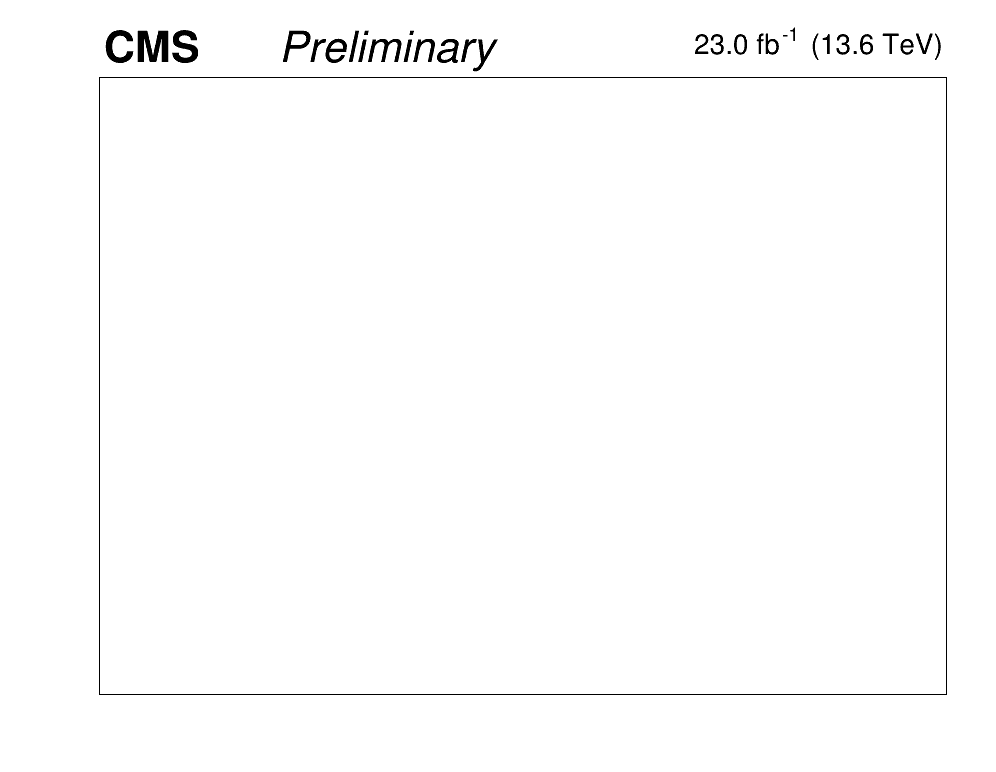

In [10]:
def plot_distr(category,tree_keys,cl_name,var,var_axis,var_label,bs,do_abs=False,do_idx_0=True):#(category,):

    can = rt.TCanvas('c','c', 1000, 800)
    leg = rt.TLegend(0.5-0.37,0.7,0.75-0.37,0.88)
    leg.SetTextSize(0.03)
    leg.SetBorderSize(0)
    leg.SetEntrySeparation(0.01)
    h = {}
    can.cd()
    phrase = "DT" if category==2 else 'CSC'
    plot_name = "Dt"  if category==2 else 'Csc'
    leg.SetHeader("CSC-"+phrase+"")

    scale = True
    
    for k in tree_keys:
    
        sel = (np.abs(dPhi_csc_csc[k]) > 1.2) & (np.abs(dPhi_csc_csc[k]) < 2.5) & (np.abs(dEta_csc_csc[k]) < 1.9)
        #cl_name = "2nd CSC, "
        if do_idx_0:
            tmp_var = var[k][sel][:,0]
        else:
            tmp_var = var[k][sel]
        if do_abs:
            tmp_var = np.abs(tmp_var)
        #var_axis = 'Csc Cluster DNN score'
        #var_label = 'CscClusterDNN'
        #bs = [100,0,1] 
        

        h[k] = create_TH1D(tmp_var.flatten(),title="",axis_title = [var_axis,'Events'], binning=bs)
        leg.AddEntry(h[k],cl_name+data_label[k],'PE' if 'data' in k else 'L')
        h[k].SetLineColor(colors[k])
        h[k].SetLineWidth(2)
        h[k].SetLineStyle(1)
        h[k].SetMarkerColor(colors[k])
        h[k].SetMarkerStyle(20)
        h[k].SetMarkerSize(1.2)
        h[k].SetMinimum(0.8)
        h[k].SetMaximum(1.e6)
        if h[k].Integral()>0 and scale:
            h[k].Scale(1./h[k].Integral())
            h[k].SetMinimum(0.0001)
            h[k].SetMaximum(1.)
        print(k)
        h[k].Draw('PE same' if 'data' in k else 'HISTO same')
        print(tmp_var)

    
    leg.Draw()
    can.SetRightMargin(0.05)
    drawCMS(lumi, "Preliminary", ERA="", onTop=True,left_marg_CMS=0.2,top_marg_cms=0.96,top_marg_lumi=0.965)

    # if setlog: 
    can.SetLogy()
    can.Draw()
    can.Print("plots/V1p19_"+plot_folder+"/"+var_label+plot_string+".pdf")
    can.Print("plots/V1p19_"+plot_folder+"/"+var_label+plot_string+".png")

    
cl_name = "2nd CSC, "    
var = cscClusterNStation
var_axis = 'Csc Cluster N Station'
var_label = 'CscClusterNStation'
bs = [4,0.5,4.5]
do_abs=False
do_idx_0=True
plot_distr(category,tree_keys,cl_name,var,var_axis,var_label,bs,do_abs,do_idx_0)

cl_name = "1st CSC, "    
var = tr_cscClusterNStation#[k][sel][:,0]
var_axis = 'Csc Cluster N Station'
var_label = 'FirstCscClusterNStation'
bs = [4,0.5,4.5]  
do_abs=False
do_idx_0=True
plot_distr(category,tree_keys,cl_name,var,var_axis,var_label,bs,do_abs,do_idx_0)

cl_name = "2nd CSC, "
var = cscClusterAvgStation#[k][sel][:,0]
var_axis = 'Csc Cluster Avg Station'
var_label = 'CscClusterAvgStation'
bs = [4,0.5,4.5]    
do_abs=False
do_idx_0=True
plot_distr(category,tree_keys,cl_name,var,var_axis,var_label,bs,do_abs,do_idx_0)

cl_name = "1st CSC, "
var = tr_cscClusterAvgStation#[k][sel][:,0]
var_axis = 'Csc Cluster Avg Station'
var_label = 'FirstCscClusterAvgStation'
bs = [4,0.5,4.5]
do_abs=False
do_idx_0=True
plot_distr(category,tree_keys,cl_name,var,var_axis,var_label,bs,do_abs,do_idx_0)

cl_name = "2nd CSC, "
var = cscClusterEta#[k][sel][:,0]
var_axis = 'Csc Cluster Eta'
var_label = 'CscClusterEta'
bs = [100,0,3]
do_abs=True
do_idx_0=True
plot_distr(category,tree_keys,cl_name,var,var_axis,var_label,bs,do_abs,do_idx_0)

cl_name = "1st CSC, "
var = tr_cscClusterEta#[k][sel][:,0]
var_axis = 'Csc Cluster Eta'
var_label = 'FirstCscClusterEta'
bs = [100,0,3]
do_abs=True
do_idx_0=True
plot_distr(category,tree_keys,cl_name,var,var_axis,var_label,bs,do_abs,do_idx_0)

cl_name = "2nd CSC, "
var = cscClusterPhi#[k][sel][:,0]
var_axis = 'Csc Cluster Phi'
var_label = 'CscClusterPhi'
bs = [100,-3.2,3.2]
do_abs=False
do_idx_0=True
plot_distr(category,tree_keys,cl_name,var,var_axis,var_label,bs,do_abs,do_idx_0)

cl_name = "1st CSC, "
var = tr_cscClusterPhi#[k][sel][:,0]
var_axis = 'Csc Cluster Phi'
var_label = 'FirstCscClusterPhi'
bs = [100,-3.2,3.2]
do_abs=False
do_idx_0=True
plot_distr(category,tree_keys,cl_name,var,var_axis,var_label,bs,do_abs,do_idx_0)

cl_name = "2nd CSC, "
var = cscClusterZ#[k][sel][:,0]/100
var_axis = 'Csc Cluster |Z| (cm)'
var_label = 'CscClusterZ'
bs = [100,400,1200]
do_abs=True
do_idx_0=True
plot_distr(category,tree_keys,cl_name,var,var_axis,var_label,bs,do_abs,do_idx_0)

cl_name = "1st CSC, "
var = tr_cscClusterZ#[k][sel][:,0]/100
var_axis = 'Csc Cluster |Z| (cm)'
var_label = 'FirstCscClusterZ'
bs = [100,400,1200]
do_abs=True
do_idx_0=True
plot_distr(category,tree_keys,cl_name,var,var_axis,var_label,bs,do_abs,do_idx_0)

cl_name = "2nd CSC, "
var = cscClusterR#[k][sel][:,0]/100
var_axis = 'Csc Cluster R (cm)'
var_label = 'CscClusterR'
bs = [100,0,1000]
do_abs=False
do_idx_0=True
plot_distr(category,tree_keys,cl_name,var,var_axis,var_label,bs,do_abs,do_idx_0)

cl_name = "1st CSC, "
var = tr_cscClusterR#[k][sel][:,0]/100
var_axis = 'Csc Cluster R (cm)'
var_label = 'FirstCscClusterR'
bs = [100,0,1000]
do_abs=False
do_idx_0=True
plot_distr(category,tree_keys,cl_name,var,var_axis,var_label,bs,do_abs,do_idx_0)


cl_name = ""
var = dEta_csc_csc#np.abs(dEta_csc_csc[k][sel])
var_axis = 'Csc Clusters #Delta#eta'
var_label = 'CscClusterDEta'
bs = [100,0,5]
do_abs=True
do_idx_0=False
plot_distr(category,tree_keys,cl_name,var,var_axis,var_label,bs,do_abs,do_idx_0)

cl_name = ""
var = dt_csc_csc#np.abs(dt_csc_csc[k][sel])
var_axis = 'Csc Clusters #Delta t'
var_label = 'CscClusterDt'
bs = [100,0,50]     
do_abs=True
do_idx_0=False
plot_distr(category,tree_keys,cl_name,var,var_axis,var_label,bs,do_abs,do_idx_0)
    
cl_name = ""
var = dR_csc_csc#np.abs(dR_csc_csc[k][sel])
var_axis = 'Csc Clusters #Delta R'
var_label = 'CscClusterDR'
bs = [100,0,6] 
do_abs=True
do_idx_0=False
plot_distr(category,tree_keys,cl_name,var,var_axis,var_label,bs,do_abs,do_idx_0)


cl_name = ""
var = dPhi_csc_csc#np.abs(dPhi_csc_csc[k][sel & (np.abs(dPhi_csc_csc[k]) < 2.5)])
var_axis = 'Csc Clusters #Delta#varphi'
var_label = 'CscClusterDPhi'
bs = [100,0,3.2]   
do_abs=True
do_idx_0=False
plot_distr(category,tree_keys,cl_name,var,var_axis,var_label,bs,do_abs,do_idx_0)
   
cl_name = "2nd CSC, "
var = cscClusterMaxStation#[k][sel][:,0]
var_axis = 'Csc Cluster Max Station'
var_label = 'CscClusterMaxStation'
bs = [4,0.5,4.5]  
do_abs=False
do_idx_0=True
plot_distr(category,tree_keys,cl_name,var,var_axis,var_label,bs,do_abs,do_idx_0)
    
cl_name = "1st CSC, "
var = tr_cscClusterMaxStation#[k][sel][:,0]
var_axis = 'Csc Cluster Max Station'
var_label = 'FirstCscClusterMaxStation'
bs = [4,0.5,4.5] 
do_abs=False
do_idx_0=True
plot_distr(category,tree_keys,cl_name,var,var_axis,var_label,bs,do_abs,do_idx_0)
    
cl_name = "2nd CSC, "
var = cscClusterMet_dPhi#np.abs(cscClusterMet_dPhi[k][sel][:,0])
var_axis = 'Csc Cluster Met dPhi'
var_label = 'CscClusterMet_dPhi'
bs = [50,0,3.2]  
do_abs=True
do_idx_0=True
plot_distr(category,tree_keys,cl_name,var,var_axis,var_label,bs,do_abs,do_idx_0)
    
cl_name = "1st CSC, "
var = tr_cscClusterMet_dPhi#np.abs(tr_cscClusterMet_dPhi[k][sel][:,0])
var_axis = 'Csc Cluster Met dPhi'
var_label = 'FirstCscClusterMet_dPhi'
bs = [50,0,3.2] 
do_abs=True
do_idx_0=True
plot_distr(category,tree_keys,cl_name,var,var_axis,var_label,bs,do_abs,do_idx_0)
    
cl_name = "2nd CSC, "
var = cscClusterSize#[k][sel][:,0]
var_axis = 'Csc Cluster Size'
var_label = 'CscClusterSize'
bs = [100,0,2000]     
do_abs=False
do_idx_0=True
plot_distr(category,tree_keys,cl_name,var,var_axis,var_label,bs,do_abs,do_idx_0)
    
cl_name = "1st CSC, "
var = tr_cscClusterSize#[k][sel][:,0]
var_axis = 'Csc Cluster Size'
var_label = 'FirstCscClusterSize'
bs = [100,0,2000] 
do_abs=False
do_idx_0=True
plot_distr(category,tree_keys,cl_name,var,var_axis,var_label,bs,do_abs,do_idx_0)

cl_name = "2nd CSC, "
var = cscClusterTime#[k][sel][:,0]
var_axis = 'Csc Cluster Time'
var_label = 'CscClusterTime'
bs = [100,-10,20]  
do_abs=False
do_idx_0=True
plot_distr(category,tree_keys,cl_name,var,var_axis,var_label,bs,do_abs,do_idx_0)
    
cl_name = "1st CSC, "
var = tr_cscClusterTime#[k][sel][:,0]
var_axis = 'Csc Cluster Time'
var_label = 'FirstCscClusterTime'
bs = [100,-50,50] 
do_abs=False
do_idx_0=True
plot_distr(category,tree_keys,cl_name,var,var_axis,var_label,bs,do_abs,do_idx_0)
    
cl_name = "2nd CSC, "
var = cscClusterTimeSpread#[k][sel][:,0]
var_axis = 'Csc Cluster TimeSpread'
var_label = 'CscClusterTimeSpread'
bs = [100,0,40]
do_abs=False
do_idx_0=True
plot_distr(category,tree_keys,cl_name,var,var_axis,var_label,bs,do_abs,do_idx_0)
    
cl_name = "1st CSC, "
var = tr_cscClusterTimeSpread#[k][sel][:,0]
var_axis = 'Csc Cluster TimeSpread'
var_label = 'FirstCscClusterTimeSpread'
bs = [100,0,40] 
do_abs=False
do_idx_0=True
plot_distr(category,tree_keys,cl_name,var,var_axis,var_label,bs,do_abs,do_idx_0)
    
cl_name = "2nd CSC, "
var = cscClusterDNN#[k][sel][:,0]
var_axis = 'Csc Cluster DNN score'
var_label = 'CscClusterDNN'
bs = [100,0,1] 
do_abs=False
do_idx_0=True
plot_distr(category,tree_keys,cl_name,var,var_axis,var_label,bs,do_abs,do_idx_0)

cl_name = "1st CSC, "
var = tr_cscClusterDNN#[k][sel][:,0]
var_axis = 'Csc Cluster DNN score'
var_label = 'FirstCscClusterDNN'
bs = [100,0,1] 
do_abs=False
do_idx_0=True
plot_distr(category,tree_keys,cl_name,var,var_axis,var_label,bs,do_abs,do_idx_0)

# ABCD

In [11]:
PHI_MIN = 1.8
PHI_CUT = 2.
#PHI_MAX = 2.
PHI_MAX = 2.5

N_MIN = 50
N_MAX = 500000000
N_CUT = 200

n_ev = 5000

pre_cut = {}
a = {}
b = {}
c = {}
d = {}

In [12]:
def extrapolation(vec,min_x,max_x,nbins):
    h = create_TH1D(vec,title="",axis_title = ['',''], binning=[nbins,min_x,max_x])#,bin_list=True)
    #can = rt.TCanvas('c','c', 1000, 800)
    #can.cd()
    h.SetLineWidth(2)
    h.SetMarkerStyle(20)
    #f1 = rt.TF1("f1","[0]*x + [1]",min_x,max_x)
    #f1.SetParameter(0,-2)
    #f1.SetParameter(1,60)
    f1 = rt.TF1("f1","exp([0]*x + [1]/(x))/[2]",min_x,max_x)
    f1.SetParameter(0,-0.03)
    f1.SetParameter(1,200)
    f1.SetParameter(2,74)
    h.Fit('f1', 'LRSQ+', '', min_x,max_x)
    my_f1 = h.GetFunction("f1")            
    h.GetListOfFunctions().Remove(h.GetFunction("f1"))
    #h.Draw("PE")
    #h.GetXaxis().SetTitle("#Delta#varphi")
    ##h.SetTitle("High n hits region: "+str(N_CUT)+" < N hits < " + str(N_MAX))
    #my_f1.SetLineStyle(2)
    #my_f1.Draw('L same')
    #can.SetLogy()
    #can.Draw()
    #can.Print("test.pdf")
    #can.Print("test.png")
    return h, my_f1

In [13]:
def run_abcd(var1,var2,MIN1,CUT1,MAX1,MIN2,CUT2,MAX2,sel,phi_th=2.2,n_th=150,do_b_extrapolation=False):
            
    d = np.sum([sel & (var1>=CUT1) & (var1<MAX1) & ( var2>MIN2 ) & ( var2<CUT2 )])#high n, low phi
    #risk of unblinding D when phi gets too large. Try to predict it instead.
    if CUT2>=phi_th:
        low_d = np.sum([sel & (var1>=CUT1) & (var1<MAX1) & ( var2>MIN2 ) & ( var2<phi_th )])
        high_d_flat = (CUT2-phi_th)*low_d/( phi_th - MIN2 )
        d_pred = low_d+high_d_flat
        print("d\t d low\t d pred")
        print("%i\t %i\t  %.2f" % (d,low_d, d_pred))
        d = low_d+high_d_flat  
    b = np.sum([sel & (var1>=MIN1) & (var1<CUT1) & ( var2>=CUT2 ) & ( var2<MAX2 )])#low n, high phi
    #risk of unblinding B when n hits gets too large. Try to predict it instead.
    if CUT1>=n_th and do_b_extrapolation:
        low_b_vec = var1[sel & (var1>=MIN1) & (var1<n_th) & ( var2>=CUT2 ) & ( var2<MAX2 )]
        low_b = np.sum([sel & (var1>=MIN1) & (var1<n_th) & ( var2>=CUT2 ) & ( var2<MAX2 )])
        h,my_f1 = extrapolation(low_b_vec,MIN1,CUT1,20)
        b_pred = my_f1.Integral(n_th,CUT1) + low_b
        print("b\t b pred")
        print("%i\t%.2f" % (b,b_pred))
        #high_b_flat = (CUT2-phi_th)*low_b/( phi_th - MIN2 )
        b = my_f1.Integral(n_th,CUT1) + low_b
        
    c = np.sum([sel & (var1>=MIN1) & (var1<CUT1) & ( var2>MIN2 ) & ( var2<CUT2 )])#low n, low phi 
    #if CUT2>=phi_th:
    #    #low_c = np.sum([sel & (var1>=MIN1) & (var1<CUT1) & ( var2>MIN2 ) & ( var2<phi_th )])
    #    #high_c_flat = (CUT2-phi_th)*low_c/( phi_th - MIN2 )
    #    #c_pred = low_c+high_c_flat
    #    #print("c\t c low\t c pred")
    #    #print("%i\t %i\t  %.2f" % (c,low_c, c_pred))
    #    #c = low_c+high_c_flat  
    a = np.sum([sel & (var1>=CUT1) & (var1<MAX1) & ( var2>=CUT2 ) & ( var2<MAX2 )])#SR  
    pred = (b*d)/c
    unc_pred = (1./b if b>0 else 0 + 1./d if d>0 else 0 + 1./c if c>0 else 0)**0.5*pred
    if math.isnan(unc_pred): 
        p_value = float("nan")
        z_value = float("nan")
    else:
        mu = np.random.normal(pred, unc_pred, n_ev)
        p_value = 0.0
        for i in mu:
            if i < 0:continue
            n = np.random.poisson(i, n_ev)
            p_value += np.count_nonzero(n>=a)
        p_value = p_value/n_ev**2
        z_value = (norm.ppf(p_value))
    return a,b,c,d,pred,unc_pred, p_value, z_value

In [14]:
def return_abcd_masks(var1,var2,MIN1,CUT1,MAX1,MIN2,CUT2,MAX2,sel):
    d = sel & (var1>=CUT1) & (var1<MAX1) & ( var2>MIN2 ) & ( var2<CUT2 )
    b = sel & (var1>=MIN1) & (var1<CUT1) & ( var2>=CUT2 ) & ( var2<MAX2 ) 
    c = sel & (var1>=MIN1) & (var1<CUT1) & ( var2>MIN2 ) & ( var2<CUT2 )  
    a = sel & (var1>=CUT1) & (var1<MAX1) & ( var2>=CUT2 ) & ( var2<MAX2 )
    return a,b,c,d

In [15]:
def make_datacard_2tag(outDataCardsDir,modelName,  signal_rate, normalization, bkg_rate, observation, bkg_unc, bkg_unc_name, sig_unc, sig_unc_name,signal_region, prefix):
    a,b,c,d = bkg_rate[0], bkg_rate[1], bkg_rate[2], bkg_rate[3]
    nSig = len(signal_rate.keys())
    text_file = open(outDataCardsDir+modelName+".txt", "w")
    text_file.write('# signal norm {0} \n'.format(normalization))

    text_file.write('imax {0} \n'.format(4))
    text_file.write('jmax {0} \n'.format(nSig))
    text_file.write('kmax * \n')
    text_file.write('shapes * * FAKE \n')


    text_file.write('--------------- \n')
    text_file.write('--------------- \n')
    text_file.write('bin \t chA \t chB \t chC \t chD \n')
    text_file.write('observation \t {0:6.2f} \t {1:6.2f} \t {2:6.2f} \t {3:6.2f} \n'.format(observation[0],observation[1],observation[2],observation[3]))
    text_file.write('------------------------------ \n')
    text_file.write('bin '+'\t chA ' * (1+nSig) + '\t chB ' * (1+nSig) +'\t chC '*(1+nSig) +'\t chD '*(1+nSig) +'\n')
    process_name = '\t '+ (' \t ').join(list(signal_rate.keys())) + '\t bkg '
    text_file.write('process ' + process_name * 4 + '\n')
    process_number = '\t '+ (' \t ').join(list((np.arange(nSig)*-1).astype(str))) + '\t 1'
    text_file.write('process ' + process_number * 4 + '\n')
    rate_string = 'rate'
    for i in range(4):# 4 bins
        for k,v in signal_rate.items():
            rate_string +='\t {0:e} '.format(v[i])
        rate_string += '\t 1 '
    text_file.write(rate_string+'\n')
    text_file.write('------------------------------ \n')

    text_file.write(prefix+'A   rateParam       chA     bkg      (@0*@2/@1)                    '+prefix+'B,'+prefix+'C,'+prefix+'D \n')
    if b == 0: text_file.write(prefix+'B   rateParam       chB     bkg     {0:.2f}        [0,{1:.2f}] \n'.format(b, c*7))
    else: text_file.write(prefix+'B   rateParam       chB     bkg     {0:.2f}        [0,{1:.2f}] \n'.format(b, b*7))
    text_file.write(prefix+'C   rateParam       chC     bkg     {0:.2f}        [0,{1:.2f}] \n'.format(c, c*7))
    if d == 0:text_file.write(prefix+'D   rateParam       chD     bkg     {0:.2f}        [0,{1:.2f}] \n'.format(d, c*7))
    else: text_file.write(prefix+'D   rateParam       chD     bkg     {0:.2f}        [0,{1:.2f}] \n'.format(d, d*7))


    #for k,v in signal_rate.items():
    #    text_file.write('norm rateParam * {0} 1  \n'.format(k))
        
    '''


  #### uncertainties ####
    for k,v in sig_unc.items():assert(len(sig_unc_name)==len(v))
    for i in range(len(sig_unc_name)):
        if 'mc_stats' in sig_unc_name[i]:
            for j, bin in enumerate(['A', 'B', 'C', 'D']):#bin
                    for l, k in enumerate(sig_unc.keys()): #channels
                        before = (len(sig_unc.keys())+1)*j+l
                        after = (len(sig_unc.keys())+1)*4-before-1
                        if sig_unc[k][i][j] > 0.0: text_file.write(sig_unc_name[i]+'_'+k+'_'+bin+' \t gmN ' +str(int(sig_unc[k][i][j]))+ '  '+'\t -  '*before + str(signal_rate[k][j]/int(sig_unc[k][i][j])) + '\t - '*after +'\n')

        else:

            unc_text = sig_unc_name[i]+' \t lnN'
            if len(sig_unc[list(sig_unc.keys())[0]][i])==4:#symmetric uncertainties
                for j in range(4):#bin
                    for k,v in sig_unc.items():
                        if v[i][j] == 0.0:unc_text += ' \t -'
                        else: unc_text += ' \t '+str(v[i][j]+1)
                    unc_text += '\t - '
            else:#asymmetric
                for j in range(4):#bin A, B, C, D
                    for k,v in sig_unc.items():
                        if  v[i][j] == 0.0 and v[i][j+4] == 0.0: unc_text += ' \t -'
                        else:unc_text += ' \t {0}/{1}'.format(1-v[i][j],1+v[i][j+4])
                    unc_text += '\t -'
            text_file.write(unc_text + ' \n')
    '''
    for i in range(len(bkg_unc_name)):
        bkg_unc_text = bkg_unc_name[i] + ' \t lnN ' + '\t - '*(4*nSig+3) + '\t ' + str(1+bkg_unc[i]) + ' \n'
        text_file.write(bkg_unc_text)
    

    text_file.close()


In [16]:
#0, 0.5, 0.8, 1, 1.1, 1.2
dr_min_list = [0.5]#[0.9]#[1.9]
phi_min_scan_list = [0,0.2,0.4,0.5,0.6,0.7,0.75,0.8,0.85,0.9,0.95,1.,1.05,1.1,1.15,1.2,1.25,1.3,1.35,1.4,1.45,1.5]

phi_min_scan_list = [1.2]
phi_cut_scan_list = np.linspace(1.5,3.1,64+1)#[1.5,1.6,1.7,1.8,1.9,2.0,2.1,2.2,2.3,2.4,2.5,2.6,2.7,2.8,3.]
phi_cut_scan_list = np.linspace(1.5,3.1,32+1)


#phi_cut_scan_list = np.array([2.85])
N_CUT = 240

time_cut_string = "IT"
plot_string_plus = plot_string+"_"+time_cut_string+"_dR"+str( dr_min_list[0] ).replace(".","p")
leghead = "|#Delta#eta|<1.9, "+time_cut_string+", #DeltaR>"+str(dr_min_list[0])+","

#one per min dphi cut
bkg_rate = {}
#bkg_unc = {}
observation = {}
signal_rate = {}

normalization = 1

for phi_cut_scan in phi_cut_scan_list:
    signal_rate[phi_cut_scan] = {}

print('k\t phi\t B\t C\t D\t A\t pred\t\t zval\t perc')
if category==1:
    #Signal
    #Data
    for k in ['data','signal']:
        tmp_dphi = np.abs( dPhi_csc_csc[k] )
        tmp_deta = np.abs(  dEta_csc_csc[k] )
        tmp_dR = np.abs(  dR_csc_csc[k] )
        tmp_dt = np.abs( dt_csc_csc[k] )
        var = cscClusterSize[k][:,0]
        t_var = cscClusterTime[k][:,0]
        t_spread_var = cscClusterTimeSpread[k][:,0]
        dphi = np.abs(dPhi_csc_csc[k])
        tmp_cut = (np.abs(tmp_deta)<1.9) & (np.abs(t_var)<15) & (np.abs(t_spread_var)<20) #sel_ev[k]  &  & (sel_jetveto_csc[k][:,1]==True) & (sel_muonveto_csc[k][:,1]==True)#& (t_var<-15) #& (t_var<-15) # #& (tmp_dR>r) #(tmp_deta>=1.9)  & ( t_var<-15  )
        for phi_cut_scan in phi_cut_scan_list:
            if phi_cut_scan<=PHI_MIN: continue
            if 'data' in k:
                a[k],b[k],c[k],d[k],pred,unc_pred, p_value, z_value = run_abcd(
                    var,dphi,
                    N_MIN,N_CUT,N_MAX,
                    PHI_MIN,phi_cut_scan,PHI_MAX,
                    tmp_cut
                    )
                print("%s\t %.2f\t %i\t %i\t %i\t %i\t %.2f +- %.2f\t %.2f\t %.2f" % (k,phi_cut_scan,b[k],c[k],d[k],a[k],pred,unc_pred,z_value, 100*(pred-a[k])/a[k]))
                observation[phi_cut_scan] = [ pred,b[k],c[k],d[k] ]
                bkg_rate[phi_cut_scan] = [ pred,b[k],c[k],d[k] ]
                #bkg_unc[phi_min_scan] = [ unc_pred,np.sqrt(b[k]),np.sqrt(c[k]),np.sqrt(d[k]) ]
            else:
                ma,mb,mc,md = return_abcd_masks(
                    var,dphi,
                    N_MIN,N_CUT,N_MAX,
                    PHI_MIN,phi_cut_scan,PHI_MAX,
                    tmp_cut
                    )
                a[k] = (np.sum(weight[k][ ma ]))*lumi/NEvents['signal']*48.58
                b[k] = (np.sum(weight[k][ mb ]))*lumi/NEvents['signal']*48.58
                c[k] = (np.sum(weight[k][ mc ]))*lumi/NEvents['signal']*48.58
                d[k] = (np.sum(weight[k][ md ]))*lumi/NEvents['signal']*48.58
                print(k,phi_cut_scan,a[k],b[k],c[k],d[k], a[k]+b[k]+c[k]+d[k])
                signal_rate[phi_cut_scan]['ggH'] = [ a[k]*normalization,b[k]*normalization,c[k]*normalization,d[k]*normalization ]



k	 phi	 B	 C	 D	 A	 pred		 zval	 perc
data	 1.85	 5706	 449	 11	 112	 139.79 +- 1.85	 2.44	 24.81
data	 1.90	 5255	 900	 19	 104	 110.94 +- 1.53	 0.69	 6.67
data	 1.95	 4818	 1337	 25	 98	 90.09 +- 1.30	 -0.78	 -8.07
data	 2.00	 4375	 1780	 29	 94	 71.28 +- 1.08	 -2.51	 -24.17
data	 2.05	 3953	 2202	 39	 84	 70.01 +- 1.11	 -1.57	 -16.65
data	 2.10	 3503	 2652	 43	 80	 56.80 +- 0.96	 -2.83	 -29.00
data	 2.15	 3105	 3050	 54	 69	 54.97 +- 0.99	 -1.76	 -20.33
d	 d low	 d pred
62	 62	  62.00
data	 2.20	 2695	 3460	 62	 61	 48.29 +- 0.93	 -1.70	 -20.83
d	 d low	 d pred
76	 62	  69.75
data	 2.25	 2235	 3920	 69	 47	 39.77 +- 0.84	 -1.06	 -15.39
d	 d low	 d pred
87	 62	  77.50
data	 2.30	 1797	 4358	 77	 36	 31.96 +- 0.75	 -0.64	 -11.23
d	 d low	 d pred
93	 62	  85.25
data	 2.35	 1350	 4805	 85	 30	 23.95 +- 0.65	 -1.12	 -20.16
d	 d low	 d pred
104	 62	  93.00
data	 2.40	 916	 5239	 92	 19	 16.26 +- 0.54	 -0.58	 -14.42
d	 d low	 d pred
110	 62	  100.75
data	 2.45	 454	 5701	 100	 13	 8.02 +- 

/afs/desy.de/user/l/lbenato/.local/lib/python3.7/site-packages/ipykernel_launcher.py:51: RuntimeWarning: invalid value encountered in double_scalars


data	 2.55	 0	 6633	 116	 0	 0.00 +- 0.00	 inf	 nan
d	 d low	 d pred
141	 62	  124.00
data	 2.60	 0	 7092	 123	 0	 0.00 +- 0.00	 inf	 nan
d	 d low	 d pred
150	 62	  131.75
data	 2.65	 0	 7558	 131	 0	 0.00 +- 0.00	 inf	 nan
d	 d low	 d pred
156	 62	  139.50
data	 2.70	 0	 7995	 139	 0	 0.00 +- 0.00	 inf	 nan
d	 d low	 d pred
165	 62	  147.25
data	 2.75	 0	 8435	 147	 0	 0.00 +- 0.00	 inf	 nan
d	 d low	 d pred
172	 62	  155.00
data	 2.80	 0	 8883	 154	 0	 0.00 +- 0.00	 inf	 nan
d	 d low	 d pred
178	 62	  162.75
data	 2.85	 0	 9323	 162	 0	 0.00 +- 0.00	 inf	 nan
d	 d low	 d pred
186	 62	  170.50
data	 2.90	 0	 9787	 170	 0	 0.00 +- 0.00	 inf	 nan
d	 d low	 d pred
200	 62	  178.25
data	 2.95	 0	 10242	 178	 0	 0.00 +- 0.00	 inf	 nan
d	 d low	 d pred
209	 62	  186.00
data	 3.00	 0	 10750	 185	 0	 0.00 +- 0.00	 inf	 nan
d	 d low	 d pred
216	 62	  193.75
data	 3.05	 0	 11246	 193	 0	 0.00 +- 0.00	 inf	 nan
d	 d low	 d pred
223	 62	  201.50
data	 3.10	 0	 11693	 201	 0	 0.00 +- 0.00	 inf	 na

In [17]:
#print(tree_keys)
    
denS = signal_gen_yield
denD = np.sum(all_weight['data'])
ks = 'signal'
kd = 'data'
L=lumi/NEvents['signal']*48.58
#L=lumi/1000.
print("Selection \t\t\t S \t\t Eff. S(%) \t B \t\t Eff. B(%) \t S/sqrt(B) ")
print("%s\t\t\t\t %.2f %.2f\t\t %.2f\t %.2f\t\t %.2f" % 
            ("No cuts",
                np.sum(all_weight[ks])*L, (100*np.sum(all_weight[ks])*L)/denS, 
                np.sum(all_weight[kd])  , (100*np.sum(all_weight[kd]))/denD,
                (np.sum(all_weight[ks]))/(np.sqrt(np.sum(all_weight[kd])))
              )
             )
                                             
print("%s\t\t\t\t %.2f %.3f \t %.2f\t %.3f\t\t %.2f" % 
            (">=1 CSC", 
               (np.sum(n_1CSC[ks])*L) , (100*np.sum(n_1CSC[ks])*L)/denS,
               (np.sum(n_1CSC[kd])) , (100*np.sum(n_1CSC[kd]))/denD,
               (np.sum(n_1CSC[ks]))/np.sqrt(np.sum(n_1CSC[kd]))
             )
            )
#print("%s\t\t %.2f\t %.3f\t\t %.2f\t %.3f\t\t %.2f" % 
#      (">=1 CSC (ME1 old)", 
#       (np.sum(n_1CSC_ME1_old[ks])*L) , (100*np.sum(n_1CSC_ME1_old[ks])*L)/denS,
#       (np.sum(n_1CSC_ME1_old[kd])) , (100*np.sum(n_1CSC_ME1_old[kd]))/denD,
#       (np.sum(n_1CSC_ME1_old[ks]))/(np.sqrt(np.sum(n_1CSC_ME1_old[kd]))),
#      )
#     )
print("%s\t\t\t %.2f\t %.3f\t\t %.2f\t %.3f\t\t %.2f" % 
      (">=1 CSC (ME1)", 
       (np.sum(n_1CSC_ME1[ks])*L) , (100*np.sum(n_1CSC_ME1[ks])*L)/denS,
       (np.sum(n_1CSC_ME1[kd])) , (100*np.sum(n_1CSC_ME1[kd]))/denD,
       (np.sum(n_1CSC_ME1[ks]))/(np.sqrt(np.sum(n_1CSC_ME1[kd]))),
      )
     )

#print("%s\t\t %.2f\t %.3f\t\t %.2f\t %.3f\t\t %.2f" % 
#      (">=1 CSC (ME1+L1)", 
#       (np.sum(n_1CSC_ME1_plateau[ks])*L) , (100*np.sum(n_1CSC_ME1_plateau[ks])*L)/denS,
#       (np.sum(n_1CSC_ME1_plateau[kd])) , (100*np.sum(n_1CSC_ME1_plateau[kd]))/denD,
#       (np.sum(n_1CSC_ME1_plateau[ks]))/(np.sqrt(np.sum(n_1CSC_ME1_plateau[kd]))),
#      )
#     )
    
#print("%s\t\t %.2f\t %.3f\t\t %.2f\t %.3f\t\t %.2f" % 
#      (">=1 CSC (ME1+L1+0L)", 
#       (np.sum(n_1CSC_ME1_plateau_0lep[ks])*L) , (100*np.sum(n_1CSC_ME1_plateau_0lep[ks])*L)/denS,
#       (np.sum(n_1CSC_ME1_plateau_0lep[kd])) , (100*np.sum(n_1CSC_ME1_plateau_0lep[kd]))/denD,
#       (np.sum(n_1CSC_ME1_plateau_0lep[ks]))/(np.sqrt(np.sum(n_1CSC_ME1_plateau_0lep[kd]))),
#      )
#     )
print("************************************************************")
#print("%s\t\t %.2f\t %.3f\t\t %.2f\t %.3f\t\t %.2f" % 
#      (">=2 CSC (ME1 old)", 
#       (np.sum(n_2CSC_ME1_old[ks])*L) , (100*np.sum(n_2CSC_ME1_old[ks])*L)/denS,
#       (np.sum(n_2CSC_ME1_old[kd])) , (100*np.sum(n_2CSC_ME1_old[kd]))/denD,
#       (np.sum(n_2CSC_ME1_old[ks]))/(np.sqrt(np.sum(n_2CSC_ME1_old[kd]))),
#      )
#     )
print("%s\t\t\t %.2f\t %.3f\t\t %.2f\t %.3f\t\t %.2f" % 
      (">=2 CSC (ME1)", 
       (np.sum(n_2CSC_ME1[ks])*L) , (100*np.sum(n_2CSC_ME1[ks])*L)/denS,
       (np.sum(n_2CSC_ME1[kd])) , (100*np.sum(n_2CSC_ME1[kd]))/denD,
       (np.sum(n_2CSC_ME1[ks]))/(np.sqrt(np.sum(n_2CSC_ME1[kd]))),
      )
     )
    
print("%s\t\t %.2f\t %.3f\t\t %.2f\t %.3f\t\t %.2f" % 
      (">=2 CSC (ME1+L1)", 
       (np.sum(n_2CSC_ME1_plateau[ks])*L) ,  (100*np.sum(n_2CSC_ME1_plateau[ks])*L)/denS,
       (np.sum(n_2CSC_ME1_plateau[kd])) ,  (100*np.sum(n_2CSC_ME1_plateau[kd]))/denD,
       (np.sum(n_2CSC_ME1_plateau[ks]))/(np.sqrt(np.sum(n_2CSC_ME1_plateau[kd]))),
      )
     )


print("%s\t\t %.2f\t %.3f\t\t %.2f\t %.3f\t\t %.2f" % 
      (">=2 CSC (ME1+L1+0L)", 
       (np.sum(n_2CSC_ME1_plateau_0lep[ks])*L) ,  (100*np.sum(n_2CSC_ME1_plateau_0lep[ks])*L)/denS,
       (np.sum(n_2CSC_ME1_plateau_0lep[kd])) ,  (100*np.sum(n_2CSC_ME1_plateau_0lep[kd]))/denD,
       (np.sum(n_2CSC_ME1_plateau_0lep[ks]))/(np.sqrt(np.sum(n_2CSC_ME1_plateau_0lep[kd]))),
      )
     )
print("%s\t\t %.2f\t %.3f\t\t %.2f\t %.3f\t\t %.2f" % 
      (">=2 CSC (ME1+L1+0L+HLT)", 
       (np.sum(n_2CSC_ME1_plateau_0lep_hlt[ks])*L) ,  (100*np.sum(n_2CSC_ME1_plateau_0lep_hlt[ks])*L)/denS,
       (np.sum(n_2CSC_ME1_plateau_0lep_hlt[kd])) ,  (100*np.sum(n_2CSC_ME1_plateau_0lep_hlt[kd]))/denD,
       (np.sum(n_2CSC_ME1_plateau_0lep_hlt[ks]))/(np.sqrt(np.sum(n_2CSC_ME1_plateau_0lep_hlt[kd]))),
      )
     )
    
print("%s\t %.2f\t %.3f\t\t %.2f\t %.3f\t\t %.2f" % 
      (">=2 CSC (ME1+L1+0L+HLT+dPhi)", 
       (np.sum(n_2CSC_ME1_plateau_0lep_hlt_dphi[ks])*L) , (100*np.sum(n_2CSC_ME1_plateau_0lep_hlt_dphi[ks])*L)/denS,
       (np.sum(n_2CSC_ME1_plateau_0lep_hlt_dphi[kd])) , (100*np.sum(n_2CSC_ME1_plateau_0lep_hlt_dphi[kd]))/denD,
       (np.sum(n_2CSC_ME1_plateau_0lep_hlt_dphi[ks]))/(np.sqrt(np.sum(n_2CSC_ME1_plateau_0lep_hlt_dphi[kd]))),
      )
     )
    
sel_s = (  np.abs(dPhi_csc_csc[ks])>1.8)
sel_d = (  np.abs(dPhi_csc_csc[kd])>1.8) & (np.abs(dPhi_csc_csc[kd])<2.5)
n_tag_s = weight[ks][sel_s][ (tr_cscClusterDNN[ks][sel_s][:,0]>0.7) & (cscClusterDNN[ks][sel_s][:,0]>0.7) ].sum()
n_tag_d = weight[kd][sel_d][ (tr_cscClusterDNN[kd][sel_d][:,0]>0.7) & (cscClusterDNN[kd][sel_d][:,0]>0.7) ].sum()

print("%s\t %.2f\t %.4f\t\t %.2f\t %.4f\t\t %.2f" % 
      (">=2 CSC 2 tagged DNN>0.7", 
       n_tag_s*L , (100*n_tag_s*L)/denS,
       n_tag_d , (100*n_tag_d)/denD,
       n_tag_s/np.sqrt(n_tag_d),
     )
     )

sel_s = (  np.abs(dPhi_csc_csc[ks])>1.8)
sel_d = (  np.abs(dPhi_csc_csc[kd])>1.8) & (np.abs(dPhi_csc_csc[kd])<2.5)
n_tag_s = weight[ks][sel_s][ (tr_cscClusterDNN[ks][sel_s][:,0]>0.8) & (cscClusterDNN[ks][sel_s][:,0]>0.8) ].sum()
n_tag_d = weight[kd][sel_d][ (tr_cscClusterDNN[kd][sel_d][:,0]>0.8) & (cscClusterDNN[kd][sel_d][:,0]>0.8) ].sum()

print("%s\t %.2f\t %.4f\t\t %.2f\t %.4f\t\t %.2f" % 
      (">=2 CSC 2 tagged DNN>0.8", 
       n_tag_s*L , (100*n_tag_s*L)/denS,
       n_tag_d , (100*n_tag_d)/denD,
       n_tag_s/np.sqrt(n_tag_d),
     )
     )

sel_s = (  np.abs(dPhi_csc_csc[ks])>1.8)
sel_d = (  np.abs(dPhi_csc_csc[kd])>1.8) & (np.abs(dPhi_csc_csc[kd])<2.5)
n_tag_s = weight[ks][sel_s][ (tr_cscClusterDNN[ks][sel_s][:,0]>0.9) & (cscClusterDNN[ks][sel_s][:,0]>0.9) ].sum()
n_tag_d = weight[kd][sel_d][ (tr_cscClusterDNN[kd][sel_d][:,0]>0.9) & (cscClusterDNN[kd][sel_d][:,0]>0.9) ].sum()

print("%s\t %.2f\t %.4f\t\t %.2f\t %.4f\t\t %.2f" % 
      (">=2 CSC 2 tagged DNN>0.9", 
       n_tag_s*L , (100*n_tag_s*L)/denS,
       n_tag_d , (100*n_tag_d)/denD,
       n_tag_s/np.sqrt(n_tag_d),
     )
     )

Selection 			 S 		 Eff. S(%) 	 B 		 Eff. B(%) 	 S/sqrt(B) 
No cuts				 1118334.97 100.00		 15508012.00	 100.00		 10889.68
>=1 CSC				 227016.98 20.300 	 15066429.00	 97.153		 2242.72
>=1 CSC (ME1)			 100069.30	 8.948		 13205931.00	 85.156		 1055.94
************************************************************
>=2 CSC (ME1)			 10243.55	 0.916		 2102962.00	 13.560		 270.87
>=2 CSC (ME1+L1)		 4456.37	 0.398		 1285096.00	 8.287		 150.74
>=2 CSC (ME1+L1+0L)		 4407.44	 0.394		 1274685.00	 8.220		 149.69
>=2 CSC (ME1+L1+0L+HLT)		 2814.46	 0.252		 61407.00	 0.396		 435.52
>=2 CSC (ME1+L1+0L+HLT+dPhi)	 2521.47	 0.225		 23687.00	 0.153		 628.23
>=2 CSC 2 tagged DNN>0.7	 1386.39	 0.1240		 1790.00	 0.0115		 1256.55
>=2 CSC 2 tagged DNN>0.8	 1184.02	 0.1059		 1365.00	 0.0088		 1228.89
>=2 CSC 2 tagged DNN>0.9	 813.71	 0.0728		 648.00	 0.0042		 1225.75
